# Visualization of results for the Basque case study

In [1189]:
import matplotlib.pyplot as plt  
import numpy as np
import os
import sys
import pandas as pd
import geopandas as gpd
import yaml

In [1190]:
case_study_name = "cs_2025-03-12_18-28-31"
input_file_name = "transport_data_years_v83_slow_densification.yaml"

current_path = os.getcwd()
print("Current path:", current_path)
file_results = os.path.normpath(current_path + "/results")
print("File results:", os.path.normpath(file_results))
file_path = os.path.join(current_path, "/results")
print(file_path)
# Normalize the path
normalized_path = os.path.normpath(file_path)
print("Normalized path:", normalized_path)

Current path: c:\Github\iDesignRES_transcompmodel\examples\Basque country
File results: c:\Github\iDesignRES_transcompmodel\examples\Basque country\results
c:/results
Normalized path: c:\results


In [1191]:
checked_path = os.path.normpath(file_results + "/" + case_study_name + "_budget_penalty_plus_dict.yaml")
if os.path.exists(checked_path):
    print(f"The path {checked_path} exists.")
else:
    print(f"The path {checked_path} does not exist.")

The path c:\Github\iDesignRES_transcompmodel\examples\Basque country\results\cs_2025-03-12_18-28-31_budget_penalty_plus_dict.yaml exists.


## Reading input data

In [1192]:
folder_input = os.path.normpath(current_path + "/data")
with open(folder_input + "/" + input_file_name) as file:
    input_data = yaml.safe_load(file)

## Reading output data

In [1193]:
# with open(os.path.normpath(file_results + "/" + case_study_name + "_n_fueling_dict.yaml")) as file:
#     n_fueling_dict= yaml.safe_load(file)

with open(os.path.normpath(file_results + "/" + case_study_name + "_budget_penalty_minus_dict.yaml")) as file:
    budget_penalty_minus_dict = yaml.safe_load(file)

with open(os.path.normpath(file_results + "/" + case_study_name + "_budget_penalty_plus_dict.yaml")) as file:
    budget_penalty_plus_dict= yaml.safe_load(file)

with open(os.path.normpath(file_results + "/" + case_study_name + "_budget_penalty_plus_yearly_dict.yaml")) as file:
    budget_penalty_plus_yearly_dict= yaml.safe_load(file)

with open(os.path.normpath(file_results + "/" + case_study_name + "_budget_penalty_minus_yearly_dict.yaml")) as file:
    budget_penalty_minus_yearly_dict= yaml.safe_load(file)
# with open(os.path.normpath(file_results + "/" + case_study_name + "_detour_time_dict.yaml")) as file:
#     detour_time_dict= yaml.safe_load(file)

with open(os.path.normpath(file_results + "/" + case_study_name + "_f_dict.yaml")) as file:
    f_dict= yaml.safe_load(file)

with open(os.path.normpath(file_results + "/" + case_study_name + "_h_dict.yaml")) as file:
    h_dict= yaml.safe_load(file)

with open(os.path.normpath(file_results + "/" + case_study_name + "_h_exist_dict.yaml")) as file:
    h_exist_dict= yaml.safe_load(file)

with open(os.path.normpath(file_results + "/" + case_study_name + "_h_minus_dict.yaml")) as file:
    h_minus_dict= yaml.safe_load(file)

with open(os.path.normpath(file_results + "/" + case_study_name + "_h_plus_dict.yaml")) as file:
    h_plus_dict= yaml.safe_load(file)

with open(os.path.normpath(file_results + "/" + case_study_name + "_q_fuel_infr_plus_dict.yaml")) as file:
    q_fuel_infr_plus_dict= yaml.safe_load(file)

with open(os.path.normpath(file_results + "/" + case_study_name + "_q_mode_infr_plus_dict.yaml")) as file:
    q_mode_infr_plus_dict= yaml.safe_load(file)

with open(os.path.normpath(file_results + "/" + case_study_name + "_s.yaml")) as file:
    s_dict= yaml.safe_load(file)



In [1194]:
def process_key(key):
    # Convert string key to a tuple
    return safe_tuple_parser(key)

def process_value(value):
    # Convert string value to float
    return float(value)

def safe_tuple_parser(key):
    """
    Safely parses string representations of nested 
    tuples into actual Python tuples.
    Example: "(2024, (1, 7, 0), (1, 8), 2024)" -> (2024, (1, 7, 0), (1, 8), 2024)
    """
    import ast  # Abstract Syntax Tree module for safe literal evaluation

    # Remove outer quotes if present and use `ast.literal_eval`
    try:
        return ast.literal_eval(key)
    except (SyntaxError, ValueError) as e:
        raise ValueError(f"Failed to parse key: {key}") from e



budget_penalty_minus = {process_key(key): process_value(value) for key, value in budget_penalty_minus_dict.items()}
budget_penalty_plus = {process_key(key): process_value(value) for key, value in budget_penalty_plus_dict.items()}
budget_penalty_plus_yearly = {process_key(key): process_value(value) for key, value in budget_penalty_plus_yearly_dict.items()}
budget_penalty_minus_yearly = {process_key(key): process_value(value) for key, value in budget_penalty_minus_yearly_dict.items()}
#detour_time = {process_key(key): process_value(value) for key, value in detour_time_dict.items()}
f = {process_key(key): process_value(value) for key, value in f_dict.items()}
h = {process_key(key): process_value(value) for key, value in h_dict.items()}
h_exist = {process_key(key): process_value(value) for key, value in h_exist_dict.items()}
h_minus = {process_key(key): process_value(value) for key, value in h_minus_dict.items()}
h_plus = {process_key(key): process_value(value) for key, value in h_plus_dict.items()}
q_fuel_infr_plus = {process_key(key): process_value(value) for key, value in q_fuel_infr_plus_dict.items()}
q_mode_infr_plus = {process_key(key): process_value(value) for key, value in q_mode_infr_plus_dict.items()}
s = {process_key(key): process_value(value) for key, value in s_dict.items()}
# n_fueling = {process_key(key): process_value(value) for key, value in n_fueling_dict.items()}


## Visualizations

- cummulative shift (vehicle stock after different types and technologies) (check!)
- shift by income class (check!)
- mode shift (check!)
- infrastructure expansion by year for each technology (check!)
- *impact of route length*

In [1195]:
print(input_data.keys())
model_parameters = input_data["Model"]
print(model_parameters)

Y = model_parameters["Y"]
y_init = model_parameters["y_init"]
pre_y = model_parameters["pre_y"]

G = pre_y + Y
g_init = y_init - pre_y
Y_end = y_init + Y - 1


dict_keys(['DetourTimeReduction', 'Edge', 'FinancialStatus', 'Fuel', 'GeographicElement', 'InitDetourTime', 'InitialFuelingInfr', 'InitialModeInfr', 'InitialVehicleStock', 'Initial_Mode_Share', 'Market_shares', 'Mode', 'Model', 'Node', 'Odpair', 'Path', 'Product', 'Regiontype', 'Speed', 'TechVehicle', 'Technology', 'Vehicletype'])
{'E': 12, 'N': 2, 'Y': 31, 'budget_penalty_minus': 10000, 'budget_penalty_plus': 100000, 'budget_penalty_yearly_minus': 100000, 'budget_penalty_yearly_plus': 1000000, 'discount_rate': 0.05, 'gamma': 0.0003, 'goals_no_new_ICEV': {2035: 0.0}, 'goals_tot_BEV': {2030: 230.0}, 'investment_period': 5, 'pre_y': 25, 'y_init': 2020}


In [1196]:
# print(input_data.keys())
fuel_list = input_data["Fuel"]
mode_list = input_data["Mode"]
techvehicle_list = input_data["TechVehicle"]
odpair_list = input_data["Odpair"]  
financial_status_list = input_data["FinancialStatus"]

od_pair_list_by_year = {}
for y in range(y_init, Y_end + 1):

    od_pair_list_by_year[y] = sum(odpair_list[r]["F"][y - y_init] for r in range(0, len(odpair_list)))


fuel_list = {item["id"]: item for item in fuel_list}
mode_list = {item["id"]: item for item in mode_list}
techvehicle_list = {item["id"]: item for item in techvehicle_list}
odpair_list = {item["id"]: item for item in odpair_list}
financial_status_list = {item["id"]: item for item in financial_status_list}

# calculating for each technology and each year the total cost
def get_vehicle_stock(by_income_class = False, income_class=None):
    techveh_stock = {}

    for tv_id in techvehicle_list:

        for y in range(y_init, Y_end + 1):
            if not by_income_class:
                total_veh_number = sum(h[(y, r, tv_id, g)] for g in range(g_init, y + 1) for r in odpair_list.keys() if (y, r, tv_id, g) in h.keys())
            else:
                total_veh_number = sum(h[(y, r, tv_id, g)] for g in range(g_init, y + 1) for r in odpair_list.keys() if odpair_list[r]["financial_status"] == income_class and (y, r, tv_id, g) in h.keys())
            techveh_stock[(y, tv_id)] = total_veh_number
    return techveh_stock

In [1197]:
# color palette defintion"
colors_techvehicles = ["#f7b267", "#76c893", "#c0b9dd", "#4f5d75", "#c9ada7", "#9a8c98", "#8e9aaf", "#8b8c89", "#463f3a", "#595959", "#604d53"]

In [1198]:
veh_stock = get_vehicle_stock(True, "Commercial")
print(veh_stock)

{(2020, 0): 287455.457715, (2021, 0): 261464.368651, (2022, 0): 247971.96167, (2023, 0): 236031.007205, (2024, 0): 224996.675754, (2025, 0): 214195.177547, (2026, 0): 204255.498148, (2027, 0): 194247.668271, (2028, 0): 184170.86693, (2029, 0): 174025.041899, (2030, 0): 163810.167095, (2031, 0): 153459.50284, (2032, 0): 143060.273169, (2033, 0): 132919.088261, (2034, 0): 119497.306534, (2035, 0): 114351.470573, (2036, 0): 104716.168849, (2037, 0): 93353.692625, (2038, 0): 82345.905021, (2039, 0): 71457.020937, (2040, 0): 56841.293422, (2041, 0): 44213.630223, (2042, 0): 21509.725573, (2043, 0): 6338.310826, (2044, 0): 0.0, (2045, 0): 0.0, (2046, 0): 0.0, (2047, 0): 0.0, (2048, 0): 0.0, (2049, 0): 0.0, (2050, 0): 0.0, (2020, 1): 2796.600643, (2021, 1): 4414.832525, (2022, 1): 6133.366322, (2023, 1): 7956.86958, (2024, 1): 9641.143506, (2025, 1): 15491.438889, (2026, 1): 22311.935462, (2027, 1): 29073.313089, (2028, 1): 35833.997586, (2029, 1): 42629.911493, (2030, 1): 49429.723683, (2031

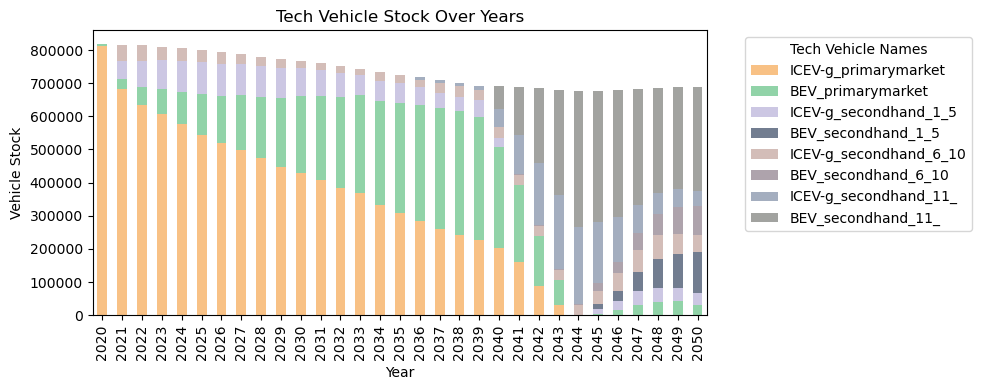

{2020: [812081.445142,
  5766.970643,
  0.0,
  0.0,
  27.664998,
  0.0,
  540.6791499999999,
  0.0],
 2021: [680936.209066,
  30697.168632,
  56181.793143,
  0.0,
  48477.331684,
  0.0,
  0.0,
  0.0],
 2022: [632958.865937,
  55849.594216,
  78363.05951,
  0.0,
  46855.136059,
  0.0,
  0.0,
  0.0],
 2023: [606060.795516,
  75592.150503,
  88538.1649,
  0.0,
  39637.102901,
  0.0,
  0.0,
  0.0],
 2024: [577252.646798,
  95931.113352,
  92811.491595,
  0.0,
  38826.60091,
  0.0,
  0.0,
  0.0],
 2025: [544663.08346,
  123116.257107,
  94693.348364,
  0.0,
  37932.702837,
  0.0,
  0.0,
  0.0],
 2026: [518233.784292,
  144135.477906,
  94693.348364,
  0.0,
  37307.318623,
  0.0,
  0.0,
  0.0],
 2027: [499305.210185,
  164250.224174,
  93625.661804,
  0.0,
  30542.382102,
  0.0,
  0.0,
  0.0],
 2028: [472805.42007,
  185838.948814,
  92843.049539,
  0.0,
  28470.001689,
  0.0,
  0.0,
  0.0],
 2029: [447908.123296,
  208740.837903,
  90441.025719,
  0.0,
  26812.908281,
  0.0,
  0.0,
  0.0],


In [1199]:
tech_vehicle_names = [techvehicle_list[tech_id]["name"] for tech_id in techvehicle_list.keys()]
fig, ax = plt.subplots(figsize=(10, 4))

years = range(y_init, Y_end + 1)
tech_ids = list(techvehicle_list.keys())

techveh_stock_all = get_vehicle_stock()

# Prepare data for stacked bar plot
data = {year: [techveh_stock_all.get((year, tech_id), 0) for tech_id in tech_ids] for year in years}
df = pd.DataFrame(data, index=tech_ids).T

# Plotting
bars = df.plot(kind='bar', stacked=True, ax=ax, color=colors_techvehicles, alpha=0.8)
ax.set_xlabel('Year')
ax.set_ylabel('Vehicle Stock')
ax.set_title('Tech Vehicle Stock Over Years')

handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, tech_vehicle_names, title='Tech Vehicle Names', bbox_to_anchor=(1.05, 1), loc='upper left')
 # plt.legend(title='Tech Vehicle ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
data

2020 0 568.344148
2021 0 0.0
2022 0 0.0
2023 0 0.0
2024 0 0.0
2025 0 0.0
2026 0 0.0
2027 0 0.0
2028 0 0.0
2029 0 0.0
2030 0 0.0
2031 0 0.0
2032 0 0.0
2033 0 0.0
2034 0 14572.758393
2035 0 3998.316797
2036 0 10735.437258
2037 0 10407.339481
2038 0 2422.120613
2039 0 2628.48713
2040 0 110236.298595
2041 0 147511.249748
2042 0 152184.406527
2043 0 131014.875311
2044 0 103020.727472
2045 0 354167.662672
2046 0 171570.862553
2047 0 180189.55025
2048 0 165284.806579
2049 0 127597.611041
2050 0 127747.584781
2020 1 39265.28
2021 1 27.664998
2022 1 0.0
2023 1 0.0
2024 1 0.0
2025 1 0.0
2026 1 0.0
2027 1 0.0
2028 1 0.0
2029 1 0.0
2030 1 0.0
2031 1 0.0
2032 1 0.0
2033 1 0.0
2034 1 0.0
2035 1 14572.758393
2036 1 3998.316797
2037 1 10735.437258
2038 1 10407.339481
2039 1 2422.120613
2040 1 2628.48713
2041 1 110236.298595
2042 1 147511.249748
2043 1 152184.406527
2044 1 131014.875311
2045 1 67031.433399
2046 1 256085.980536
2047 1 113109.51808
2048 1 144671.718313
2049 1 147503.486259
2050 1 125485.

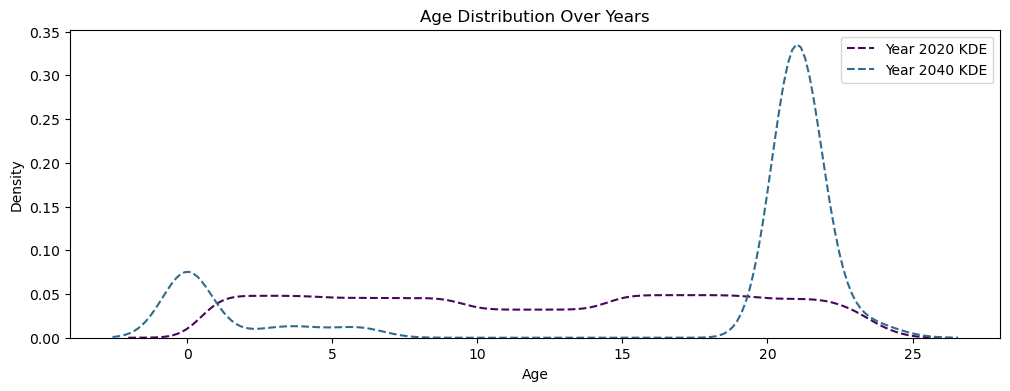

In [1200]:
import scipy.stats as stats
import seaborn as sns

# determining technology share in each year + age strucuture
age_distribution_per_year = {}
ages = []
for y in range(y_init, Y_end + 1):
    total_veh_number = sum(h[(y, r, tv_id, g)] for g in range(g_init, y + 1) for r in odpair_list.keys() for tv_id in techvehicle_list.keys() if (y, r, tv_id, g) in h.keys())
    for g in range(g_init, y+1):
        curr_veh_nb = sum(h[(y, r, tv_id, g)] for r in odpair_list.keys() for tv_id in techvehicle_list.keys() if (y, r, tv_id, g) in h.keys())
        age = y - g
        if (y, age) in age_distribution_per_year.keys():
            age_distribution_per_year[(y, age)] += curr_veh_nb
        else:
            age_distribution_per_year[(y, age)] = curr_veh_nb
        ages.append(age)

for age in range(0, max(ages)):
    for y in range(y_init, Y_end + 1):
        if (y, age) not in age_distribution_per_year.keys():
            age_distribution_per_year[(y, age)] = 0
        print(y, age, age_distribution_per_year[(y, age)])

# Create a list of hex codes with different colors
print(age_distribution_per_year)
color_palette = sns.color_palette("viridis", 60).as_hex()
fig, ax = plt.subplots(figsize=(12, 4))
for y in range(y_init, Y_end + 1):
    if y in [2020, 2040, 2059]:
        # Create a DataFrame for the current year
        age_distribution_per_year[y] = {age: age_distribution_per_year[(y, age)] for age in range(0, max(ages)) if (y, age) in age_distribution_per_year.keys()}
        curr_distribution = age_distribution_per_year[y]

        df = pd.DataFrame(list(curr_distribution.items()), columns=["Age", "Count"])
        df = df.apply(pd.to_numeric, errors="coerce")  # Convert to numbers, set invalid to NaN
        df.dropna(inplace=True)  # Drop NaN values
        # Expand data by repeating ages according to their counts
        expanded_ages = np.repeat(df["Age"], df["Count"])

        # Fit a Normal Distribution
        mu, sigma = stats.norm.fit(expanded_ages)

        # Generate x values for PDF
        x = np.linspace(min(df["Age"]), max(df["Age"]), 100)
        pdf = stats.norm.pdf(x, mu, sigma)

        # Plot KDE & Normal Fit
        sns.kdeplot(expanded_ages, bw_adjust=1.5, label=f"Year {y} KDE", linestyle="dashed", color=color_palette[y - y_init])
        # plt.plot(x, pdf, label=f"Year {y} Fit (μ={mu:.1f}, σ={sigma:.1f})", color=color_palette[y - y_init])

# Formatting the plot
plt.title("Age Distribution Over Years")
plt.xlabel("Age")
plt.ylabel("Density")
plt.legend()

plt.savefig(os.path.normpath(file_results + "/" + case_study_name + "_age_distribution.png"), transparent=True)
for y in range(y_init, Y_end + 1):
    for age in range(0, max(ages)):
        print(y, age, age_distribution_per_year[(y, age)])
    

2020 2050


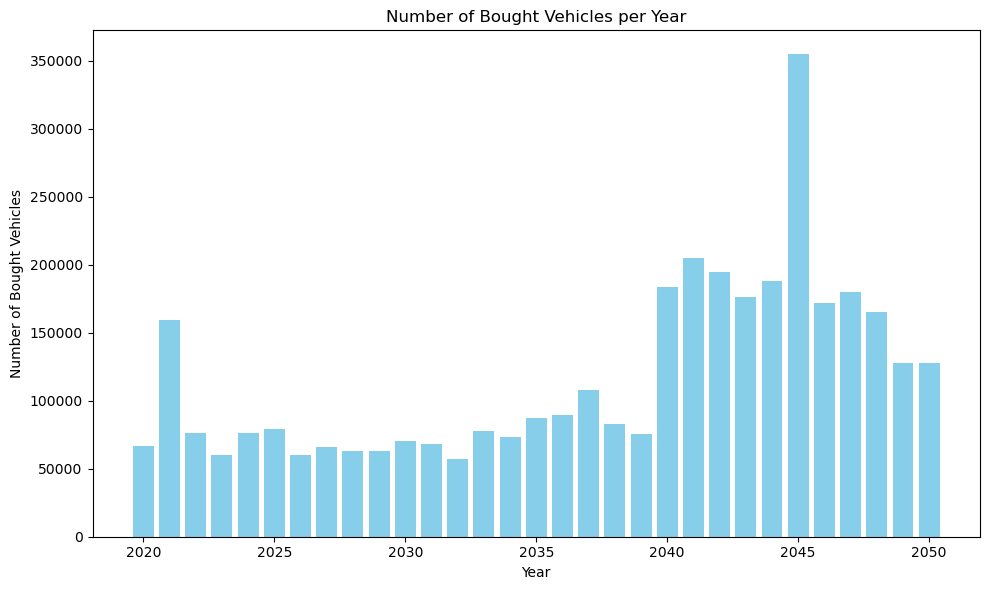

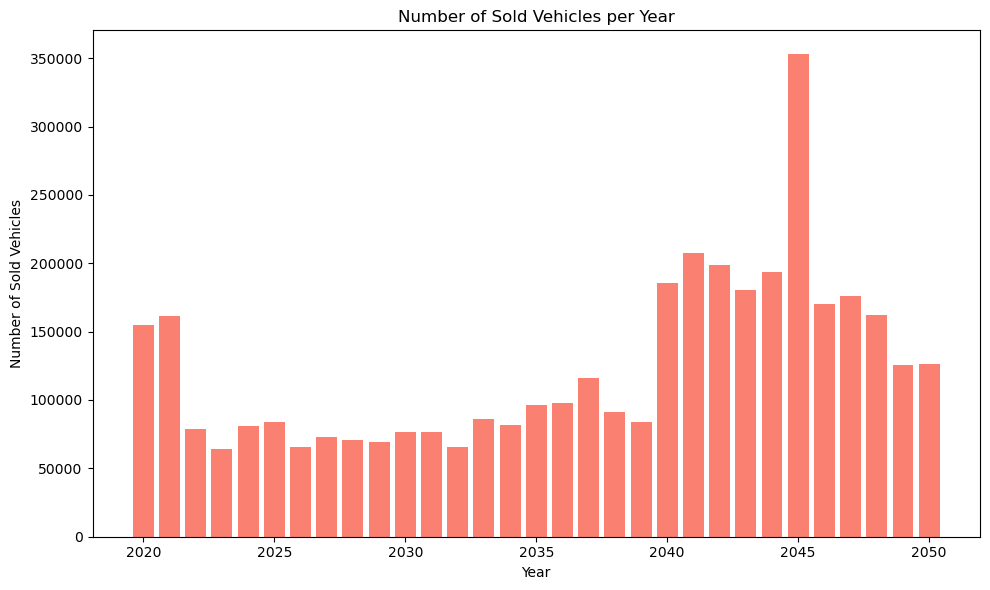

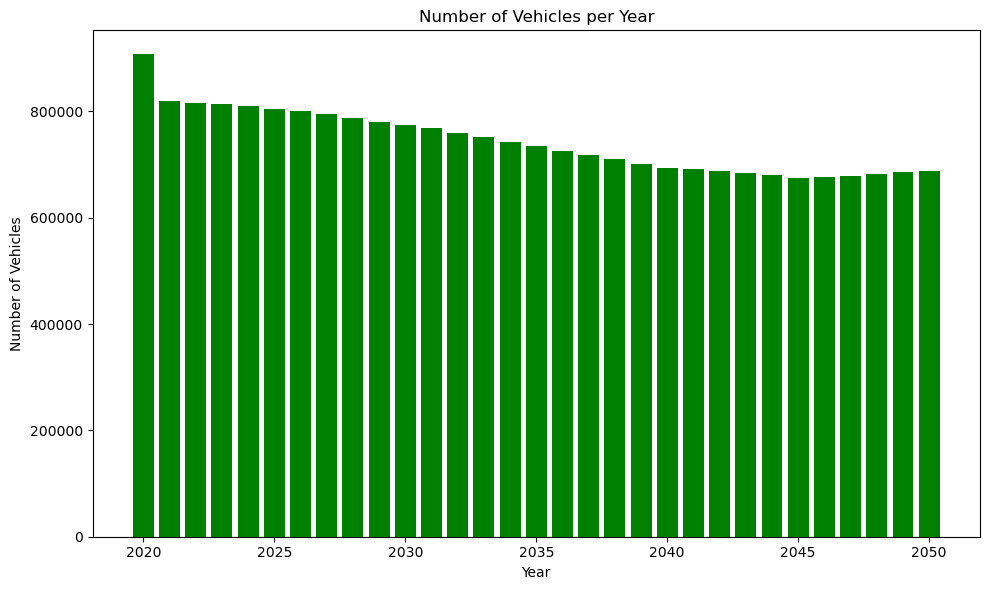

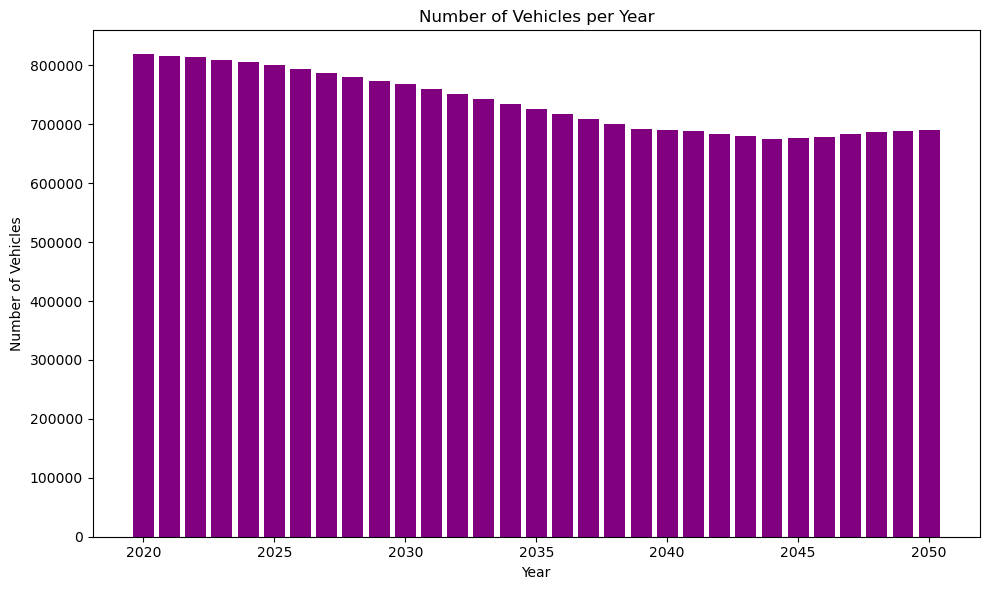

In [1201]:
# ANALYSIS OF BOUGHT AND SOLD VEHICLES 
bought_vehicles = {}
exiting_vehicles = {}
h_now = {}
h_all = {}
print(y_init, Y_end)
for y in range(y_init, Y_end + 1):
    total_veh_number = sum(h_plus[(y, r, tv_id, g)] for g in range(g_init, y + 1) for r in odpair_list.keys() for tv_id in techvehicle_list.keys() if (y, r, tv_id, g) in h.keys())
    bought_vehicles[y] = total_veh_number
    total_veh_number = sum(h_minus[(y, r, tv_id, g)] for g in range(g_init, y + 1) for r in odpair_list.keys() for tv_id in techvehicle_list.keys() if (y, r, tv_id, g) in h.keys())
    exiting_vehicles[y] = total_veh_number
    total_veh_number = sum(h_exist[(y, r, tv_id, g)] for g in range(g_init, y + 1) for r in odpair_list.keys() for tv_id in techvehicle_list.keys() if (y, r, tv_id, g) in h.keys())
    h_now[y] = total_veh_number
    total_veh_number = sum(h[(y, r, tv_id, g)] for g in range(g_init, y + 1) for r in odpair_list.keys() for tv_id in techvehicle_list.keys() if (y, r, tv_id, g) in h.keys())
    h_all[y] = total_veh_number

fig, ax = plt.subplots(figsize=(10, 6))

years = range(y_init, Y_end + 1)
bought_values = [bought_vehicles[year] for year in years]

ax.bar(years, bought_values, color='skyblue')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Bought Vehicles')
ax.set_title('Number of Bought Vehicles per Year')

plt.tight_layout()
plt.show()

sold_values = [exiting_vehicles[year] for year in years]

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(years, sold_values, color='salmon')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Sold Vehicles')
ax.set_title('Number of Sold Vehicles per Year')

plt.tight_layout()
plt.show()

h_now_values = [h_now[year] for year in years]

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(years, h_now_values, color='green')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Vehicles')
ax.set_title('Number of Vehicles per Year')
plt.tight_layout()
plt.show()

h_all_values = [h_all[year] for year in years]

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(years, h_all_values, color='purple')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Vehicles')
ax.set_title('Number of Vehicles per Year')
plt.tight_layout()
plt.show()

2020 2050


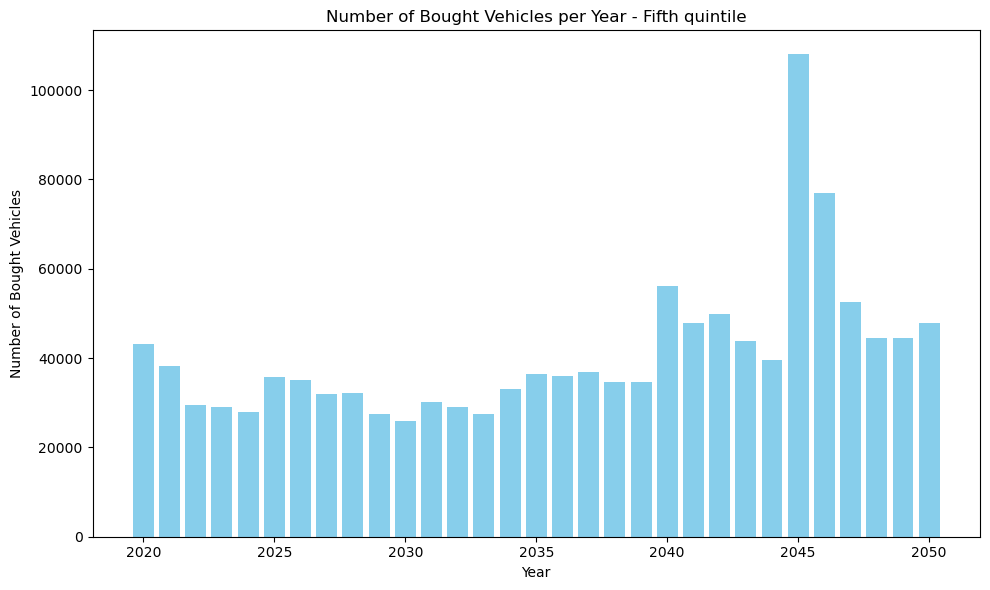

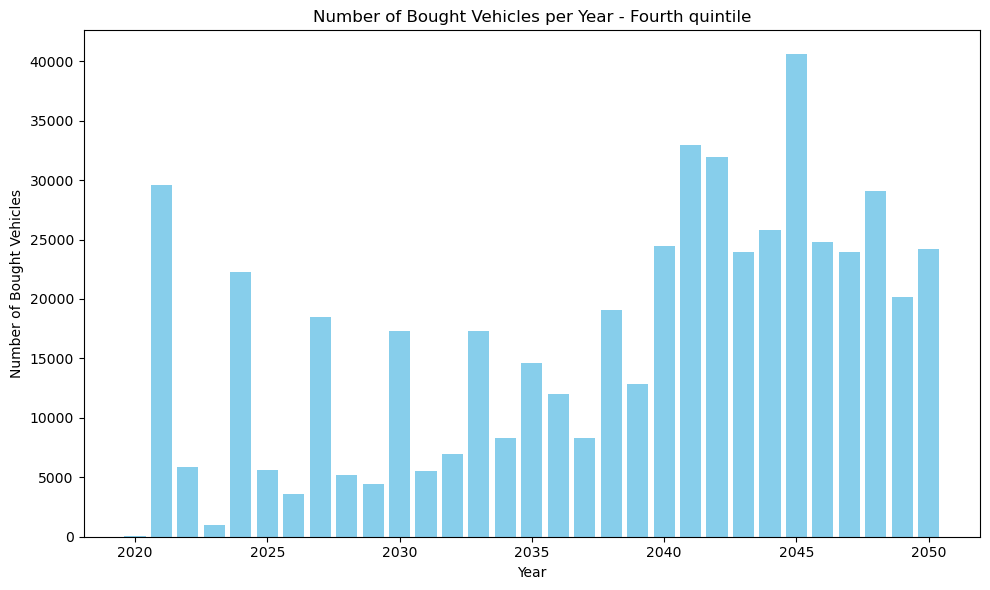

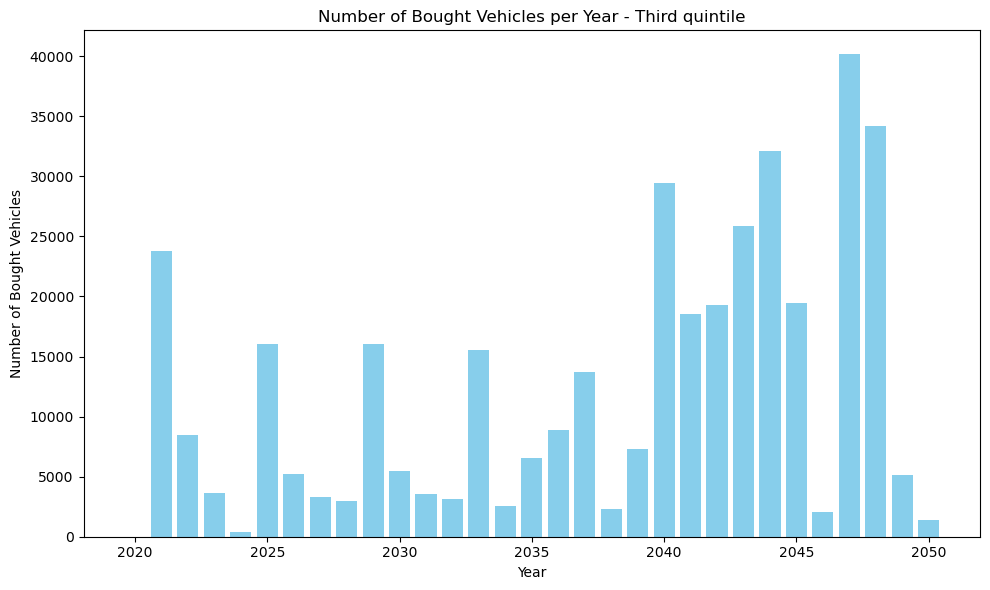

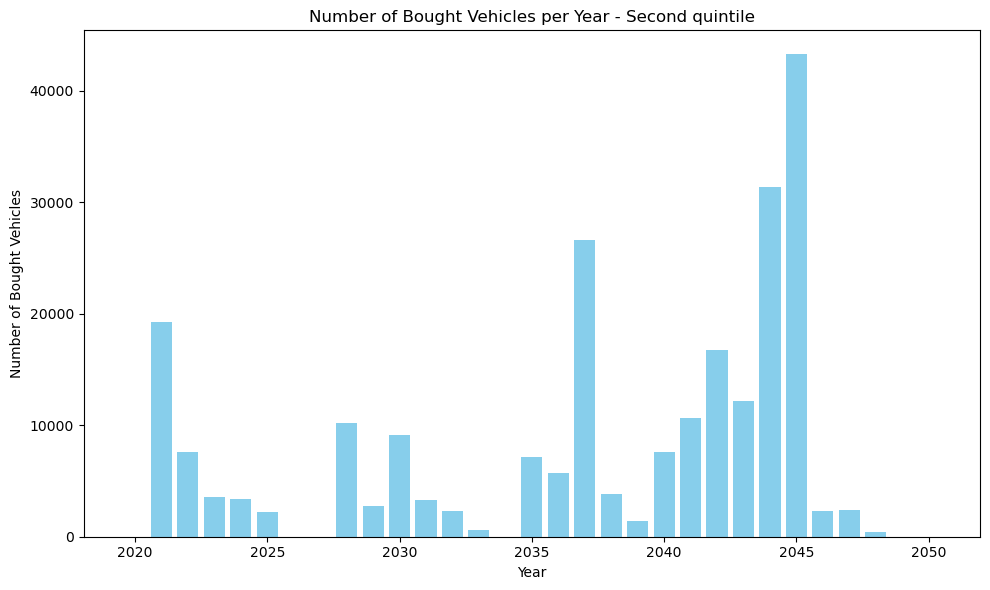

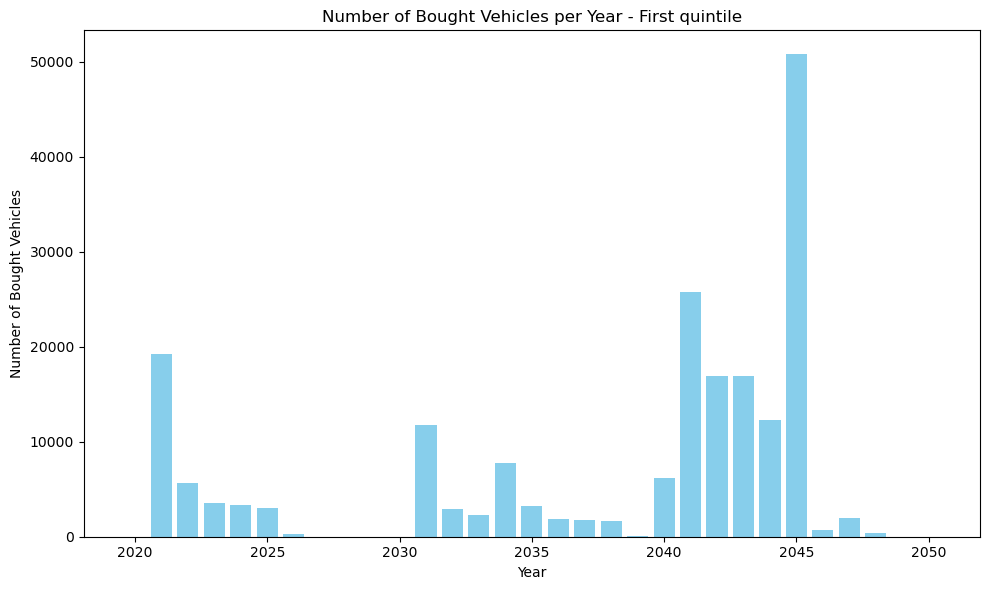

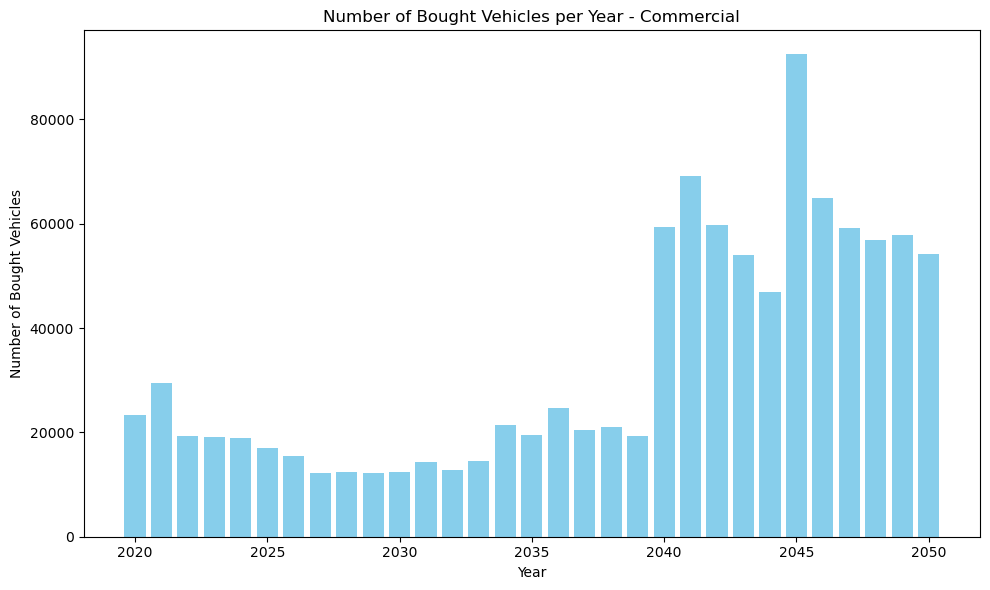

In [1202]:
# purchases by income class
financial_status_list = input_data["FinancialStatus"]
financial_status_list = {item["id"]: item for item in financial_status_list}


print(y_init, Y_end)
for fin in financial_status_list.keys():
    bought_vehicles = {}
    exiting_vehicles = {}
    h_now = {}
    h_all = {}
    income_class = financial_status_list[fin]["name"]
    for y in range(y_init, Y_end + 1):
        total_veh_number = sum(h_plus[(y, r, tv_id, g)] for g in range(g_init, y + 1) for r in odpair_list.keys() for tv_id in techvehicle_list.keys() if odpair_list[r]["financial_status"] == income_class and (y, r, tv_id, g) in h.keys())
        bought_vehicles[y] = total_veh_number
        total_veh_number = sum(h_minus[(y, r, tv_id, g)] for g in range(g_init, y + 1) for r in odpair_list.keys() for tv_id in techvehicle_list.keys() if (y, r, tv_id, g) in h.keys())
        exiting_vehicles[y] = total_veh_number
        total_veh_number = sum(h_exist[(y, r, tv_id, g)] for g in range(g_init, y + 1) for r in odpair_list.keys() for tv_id in techvehicle_list.keys() if (y, r, tv_id, g) in h.keys())
        h_now[y] = total_veh_number
        total_veh_number = sum(h[(y, r, tv_id, g)] for g in range(g_init, y + 1) for r in odpair_list.keys() for tv_id in techvehicle_list.keys() if (y, r, tv_id, g) in h.keys())
        h_all[y] = total_veh_number

    fig, ax = plt.subplots(figsize=(10, 6))

    years = range(y_init, Y_end + 1)
    bought_values = [bought_vehicles[year] for year in years]

    ax.bar(years, bought_values, color='skyblue')
    ax.set_xlabel('Year')
    ax.set_ylabel('Number of Bought Vehicles')
    ax.set_title('Number of Bought Vehicles per Year - ' + income_class)

    plt.tight_layout()
    plt.savefig(os.path.normpath(file_results + "/" + case_study_name + "_bought_vehicles_" + income_class + ".png"), transparent=True)

In [1203]:
tech_vehicle_names = [techvehicle_list[tech_id]["name"] for tech_id in techvehicle_list.keys()]

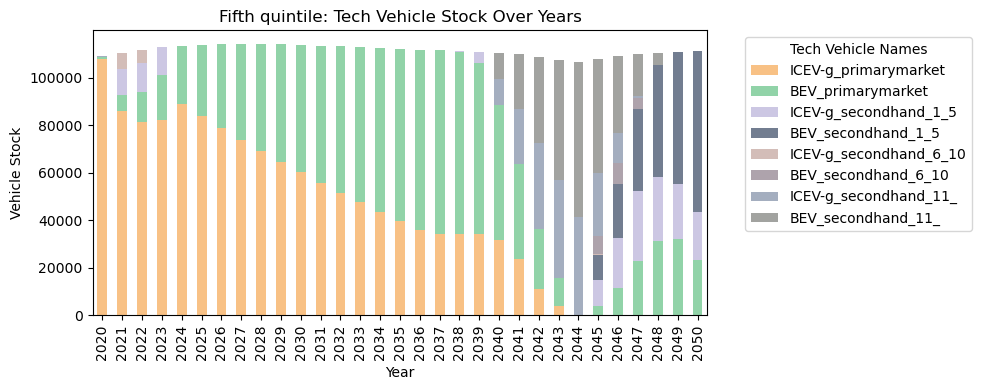

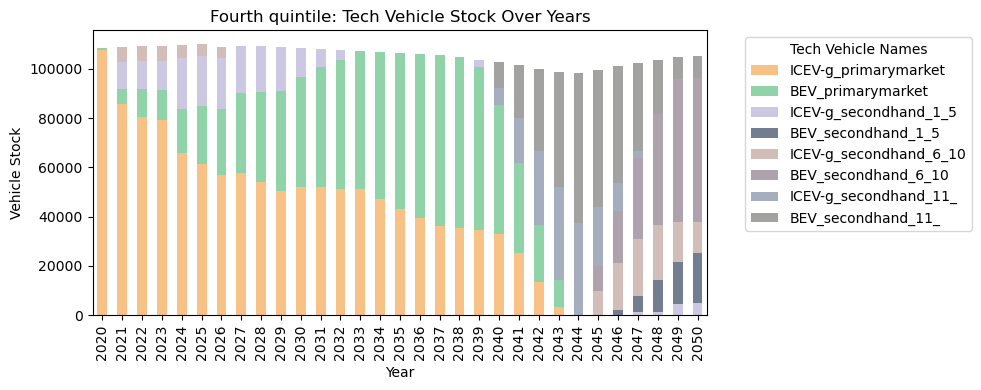

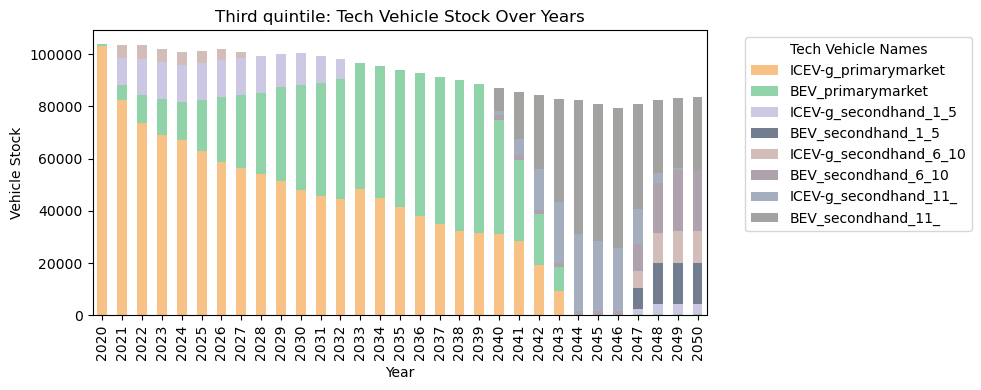

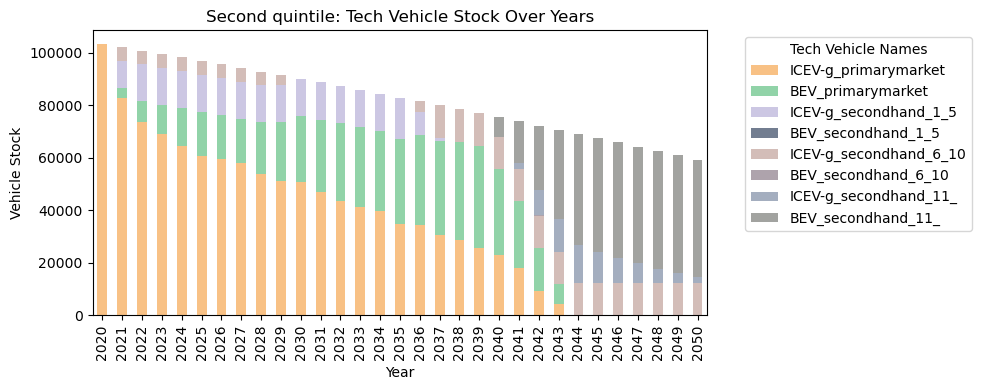

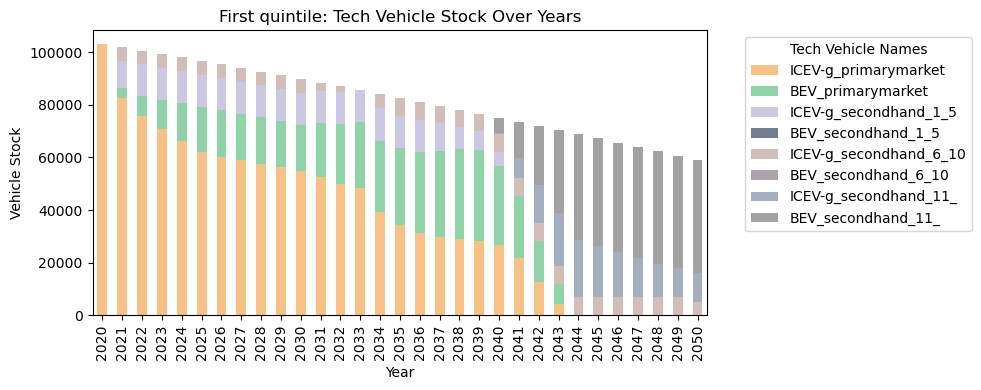

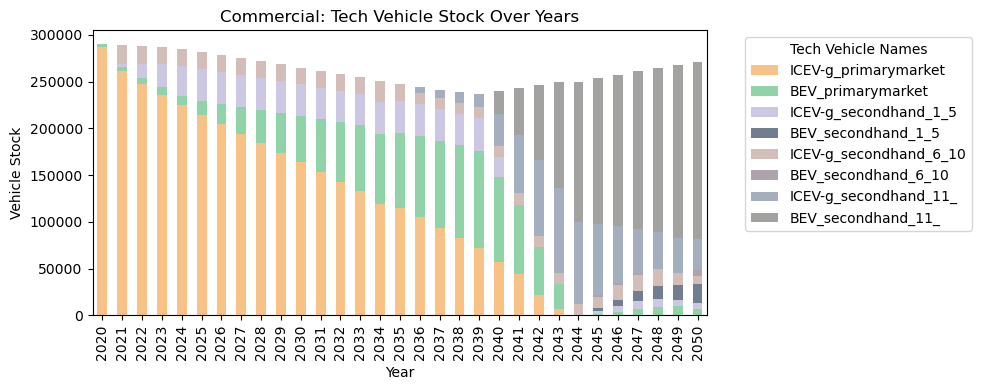

In [1204]:
financial_status_list = input_data["FinancialStatus"]
financial_status_list = {item["id"]: item for item in financial_status_list}
for fin in financial_status_list.keys():
    tech_vehicle_names = [techvehicle_list[tech_id]["name"] for tech_id in techvehicle_list.keys()]
    fig, ax = plt.subplots(figsize=(10, 4))

    years = range(y_init, Y_end + 1)
    tech_ids = list(techvehicle_list.keys())

    techveh_stock_all = get_vehicle_stock(by_income_class=True, income_class=financial_status_list[fin]["name"])

    # Prepare data for stacked bar plot
    
    data = {year: [techveh_stock_all.get((year, tech_id), 0) for tech_id in tech_ids] for year in years}
    df = pd.DataFrame(data, index=tech_ids).T

    # Plotting
    bars = df.plot(kind='bar', stacked=True, ax=ax, color=colors_techvehicles, alpha=0.8)
    ax.set_xlabel('Year')
    ax.set_ylabel('Vehicle Stock')
    ax.set_title(financial_status_list[fin]["name"]+ ': Tech Vehicle Stock Over Years')
    handles, _ = ax.get_legend_handles_labels()
    ax.legend(handles, tech_vehicle_names, title='Tech Vehicle Names', bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout()
    plt.savefig(os.path.normpath(file_results + "/" + case_study_name + "_tech_vehicle_stock_" + financial_status_list[fin]["name"] + ".png"), transparent=True)


{(2041, 64): 0.0, (2032, 20): 0.0, (2046, 21): 0.0, (2048, 43): 0.0, (2031, 57): 0.0, (2036, 13): 0.0, (2037, 89): 0.0, (2040, 81): 0.0, (2046, 13): 0.0, (2044, 57): 0.0, (2024, 26): 0.0, (2039, 23): 0.0, (2038, 89): 0.0, (2033, 86): 0.0, (2039, 43): 0.0, (2046, 46): 0.0, (2026, 81): 0.0, (2030, 37): 0.0, (2049, 29): 0.0, (2046, 53): 0.0, (2025, 70): 0.0, (2031, 73): 0.0, (2042, 18): 0.0, (2041, 76): 0.0, (2022, 6): 0.0, (2045, 40): 0.0, (2046, 64): 0.0, (2025, 20): 0.0, (2028, 17): 0.0, (2030, 36): 0.0, (2029, 15): 0.0, (2041, 65): 0.0, (2043, 51): 0.0, (2021, 52): 0.0, (2050, 89): 0.0, (2041, 38): 0.0, (2028, 37): 0.0, (2029, 60): 0.0, (2047, 60): 0.0, (2036, 69): 0.0, (2039, 73): 0.0, (2034, 30): 0.0, (2030, 15): 0.0, (2027, 30): 0.0, (2032, 35): 0.0, (2048, 37): 0.0, (2045, 82): 0.0, (2028, 80): 0.0, (2039, 80): 0.0, (2031, 30): 0.0, (2037, 69): 0.0, (2025, 33): 0.0, (2030, 39): 0.0, (2021, 75): 0.0, (2024, 35): 0.0, (2032, 63): 0.0, (2042, 78): 0.0, (2043, 87): 0.0, (2021, 69): 0.

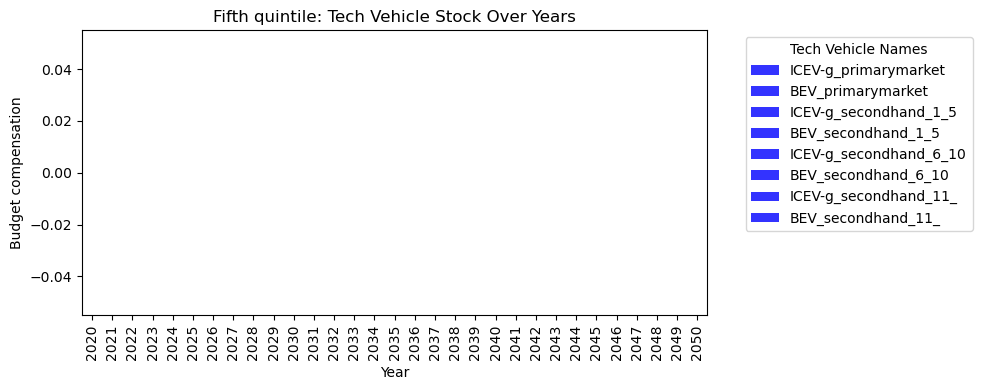

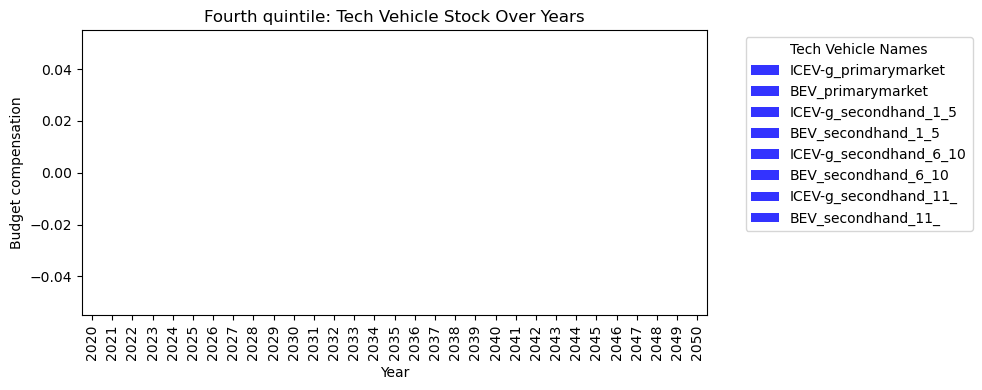

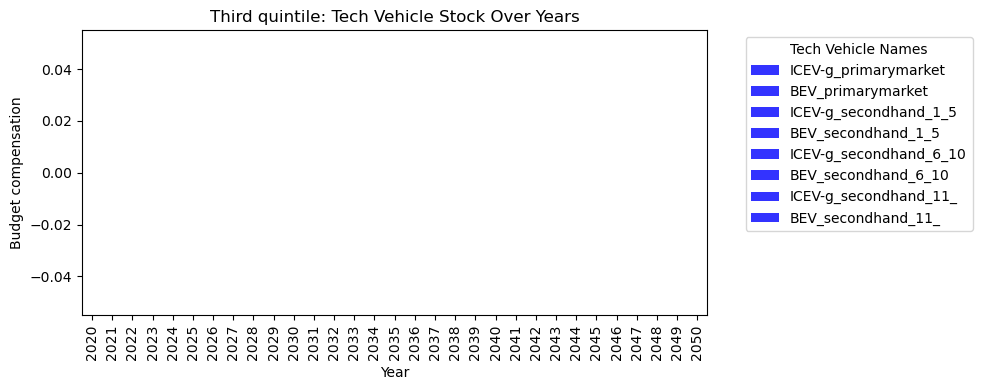

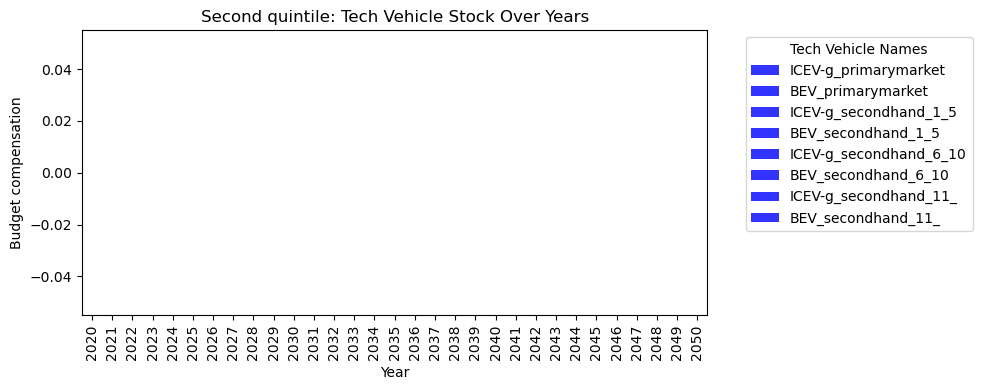

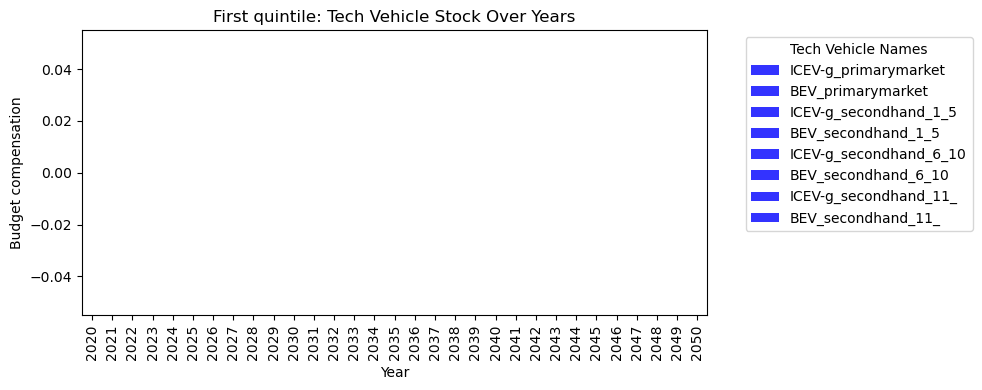

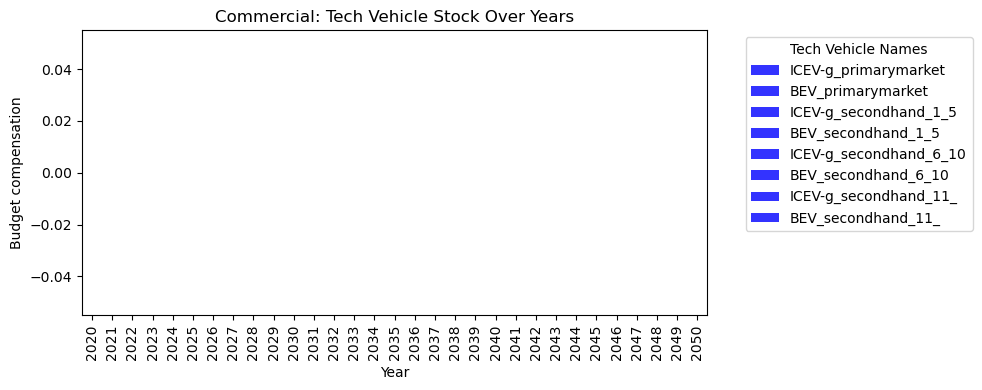

In [1205]:
# looking a budget penalties
def get_budget_penalty_total(by_income_class = False, income_class=None):
    budget_pen = {}

    # for tv_id in techvehicle_list:

    for y in range(y_init, Y_end + 1):
        if not by_income_class:
            total_budget_nb_plus = sum(budget_penalty_plus[(y, r)] for g in range(g_init, y + 1) for r in odpair_list.keys() if (y, r) in budget_penalty_plus.keys())
            total_budget_nb_minus = sum(budget_penalty_minus[(y, r)] for g in range(g_init, y + 1) for r in odpair_list.keys() if (y, r) in budget_penalty_minus.keys())
        else:
            total_budget_nb_plus = sum(budget_penalty_plus[(y, r)] for g in range(g_init, y + 1) for r in odpair_list.keys() if odpair_list[r]["financial_status"] == income_class and (y, r) in budget_penalty_plus.keys())
            total_budget_nb_minus = sum(budget_penalty_minus[(y, r)] for g in range(g_init, y + 1) for r in odpair_list.keys() if odpair_list[r]["financial_status"] == income_class and (y, r) in budget_penalty_minus.keys())
        budget_pen[(y)] = total_budget_nb_plus + total_budget_nb_minus
    return budget_pen

financial_status_list = input_data["FinancialStatus"]
financial_status_list = {item["id"]: item for item in financial_status_list}
for fin in financial_status_list.keys():
    tech_vehicle_names = [techvehicle_list[tech_id]["name"] for tech_id in techvehicle_list.keys()]
    fig, ax = plt.subplots(figsize=(10, 4))

    years = range(y_init, Y_end + 1)
    tech_ids = list(techvehicle_list.keys())

    techveh_stock_all = get_budget_penalty_total(by_income_class=True, income_class=financial_status_list[fin]["name"])

    # Prepare data for stacked bar plot
    
    data = {year: [techveh_stock_all.get((year))]for year in years}
    df = pd.DataFrame(data, index=tech_ids).T

    # Plotting
    bars = df.plot(kind='bar', stacked=True, ax=ax, color="blue", alpha=0.8)
    ax.set_xlabel('Year')
    ax.set_ylabel('Budget compensation')
    ax.set_title(financial_status_list[fin]["name"]+ ': Tech Vehicle Stock Over Years')
    handles, _ = ax.get_legend_handles_labels()
    ax.legend(handles, tech_vehicle_names, title='Tech Vehicle Names', bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout()
    plt.savefig(os.path.normpath(file_results + "/" + case_study_name + "_tech_vehicle_stock_" + financial_status_list[fin]["name"] + ".png"), transparent=True)
print(budget_penalty_plus)

{(2041, 64): 0.0, (2032, 20): 0.0, (2046, 21): 0.0, (2048, 43): 0.0, (2031, 57): 0.0, (2036, 13): 0.0, (2037, 89): 0.0, (2040, 81): 0.0, (2046, 13): 0.0, (2044, 57): 0.0, (2024, 26): 0.0, (2039, 23): 0.0, (2038, 89): 0.0, (2033, 86): 0.0, (2039, 43): 0.0, (2046, 46): 0.0, (2026, 81): 0.0, (2030, 37): 0.0, (2049, 29): 0.0, (2046, 53): 0.0, (2025, 70): 0.0, (2031, 73): 0.0, (2042, 18): 0.0, (2041, 76): 0.0, (2022, 6): 0.0, (2045, 40): 0.0, (2046, 64): 0.0, (2025, 20): 0.0, (2028, 17): 0.0, (2030, 36): 0.0, (2029, 15): 0.0, (2041, 65): 0.0, (2043, 51): 0.0, (2021, 52): 0.0, (2050, 89): 0.0, (2041, 38): 0.0, (2028, 37): 0.0, (2029, 60): 0.0, (2047, 60): 0.0, (2036, 69): 0.0, (2039, 73): 0.0, (2034, 30): 0.0, (2030, 15): 0.0, (2027, 30): 0.0, (2032, 35): 0.0, (2048, 37): 0.0, (2045, 82): 0.0, (2028, 80): 0.0, (2039, 80): 0.0, (2031, 30): 0.0, (2037, 69): 0.0, (2025, 33): 0.0, (2030, 39): 0.0, (2021, 75): 0.0, (2024, 35): 0.0, (2032, 63): 0.0, (2042, 78): 0.0, (2043, 87): 0.0, (2021, 69): 0.

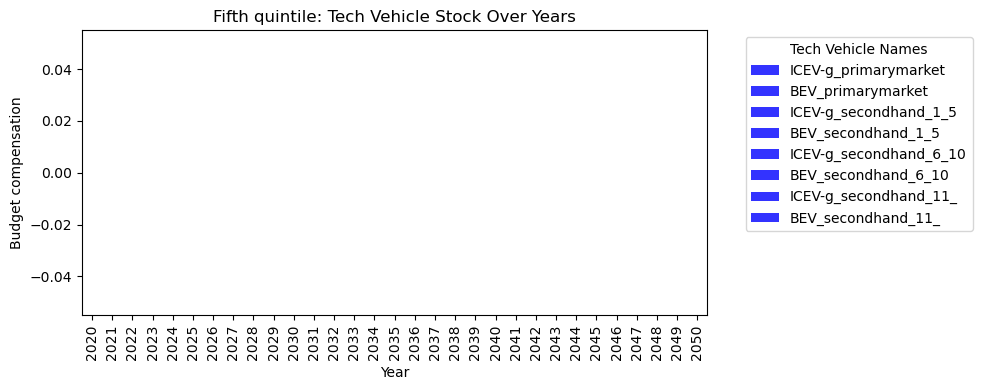

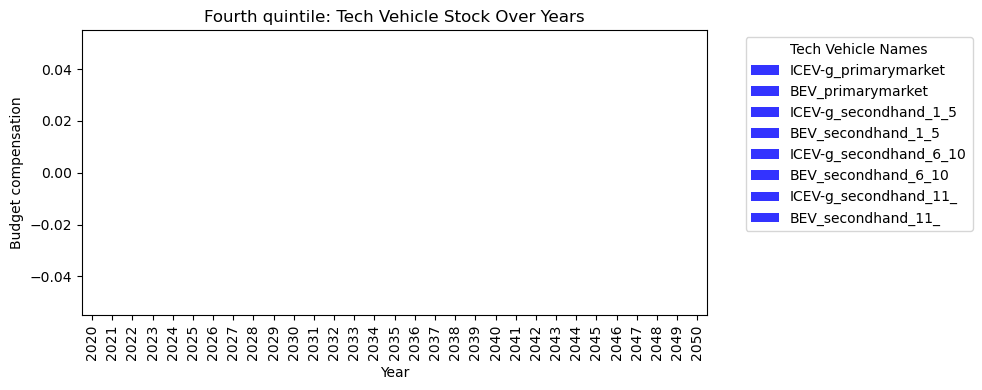

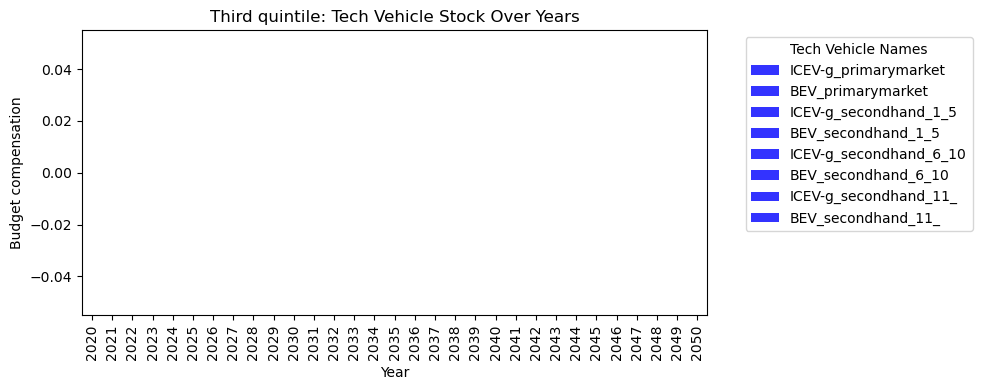

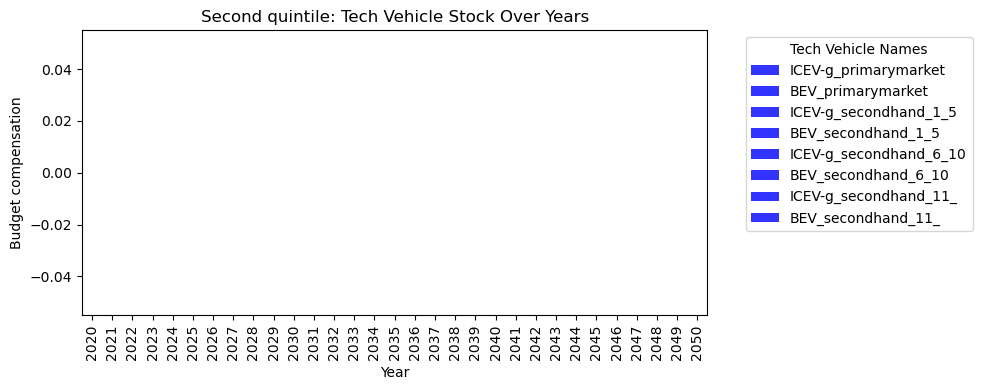

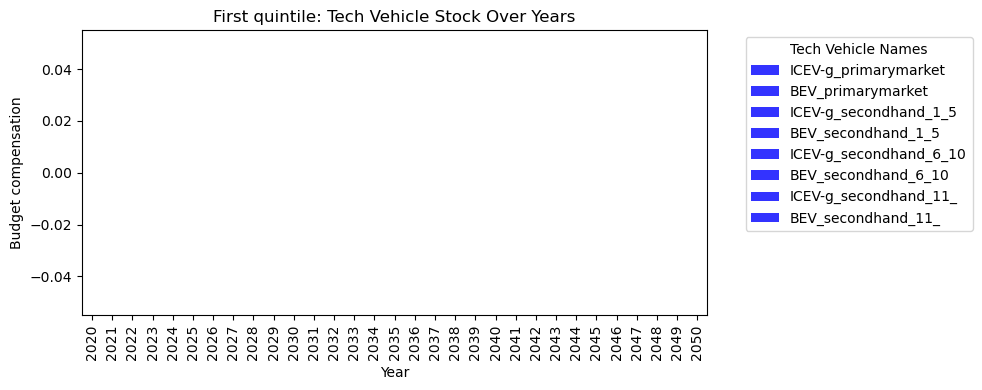

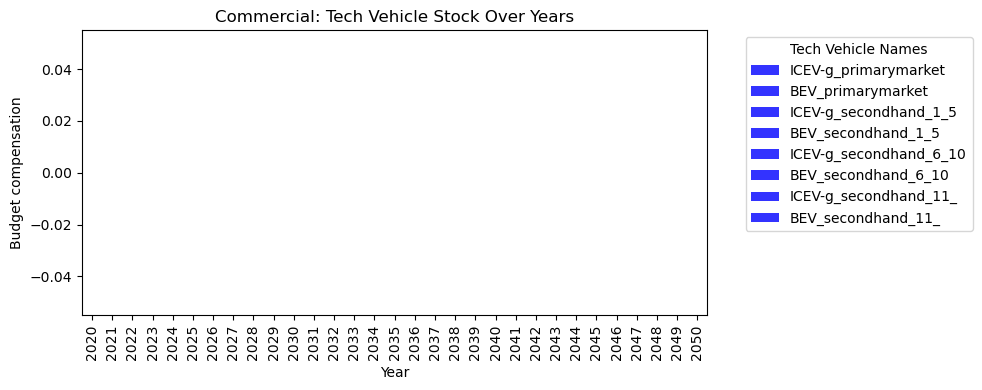

In [1206]:
# looking a budget penalties
def get_budget_penalty_total_yearly(by_income_class = False, income_class=None):
    budget_pen = {}

    # for tv_id in techvehicle_list:

    for y in range(y_init, Y_end + 1):
        if not by_income_class:
            total_budget_nb_plus = sum(budget_penalty_plus_yearly[(y, r)] for g in range(g_init, y + 1) for r in odpair_list.keys() if (y, r) in budget_penalty_plus.keys())
            total_budget_nb_minus = sum(budget_penalty_minus_yearly[(y, r)] for g in range(g_init, y + 1) for r in odpair_list.keys() if (y, r) in budget_penalty_minus.keys())
        else:
            total_budget_nb_plus = sum(budget_penalty_plus_yearly[(y, r)] for g in range(g_init, y + 1) for r in odpair_list.keys() if odpair_list[r]["financial_status"] == income_class and (y, r) in budget_penalty_plus.keys())
            total_budget_nb_minus = sum(budget_penalty_minus_yearly[(y, r)] for g in range(g_init, y + 1) for r in odpair_list.keys() if odpair_list[r]["financial_status"] == income_class and (y, r) in budget_penalty_minus.keys())
        budget_pen[(y)] = total_budget_nb_plus + total_budget_nb_minus
    return budget_pen

financial_status_list = input_data["FinancialStatus"]
financial_status_list = {item["id"]: item for item in financial_status_list}
for fin in financial_status_list.keys():
    tech_vehicle_names = [techvehicle_list[tech_id]["name"] for tech_id in techvehicle_list.keys()]
    fig, ax = plt.subplots(figsize=(10, 4))

    years = range(y_init, Y_end + 1)
    tech_ids = list(techvehicle_list.keys())

    techveh_stock_all = get_budget_penalty_total_yearly(by_income_class=True, income_class=financial_status_list[fin]["name"])

    # Prepare data for stacked bar plot
    
    data = {year: [techveh_stock_all.get((year))]for year in years}
    df = pd.DataFrame(data, index=tech_ids).T

    # Plotting
    bars = df.plot(kind='bar', stacked=True, ax=ax, color="blue", alpha=0.8)
    ax.set_xlabel('Year')
    ax.set_ylabel('Budget compensation')
    ax.set_title(financial_status_list[fin]["name"]+ ': Tech Vehicle Stock Over Years')
    handles, _ = ax.get_legend_handles_labels()
    ax.legend(handles, tech_vehicle_names, title='Tech Vehicle Names', bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout()
    plt.savefig(os.path.normpath(file_results + "/" + case_study_name + "_tech_vehicle_stock_" + financial_status_list[fin]["name"] + ".png"), transparent=True)
print(budget_penalty_plus)

## Fueling infrastructure investments

In [1207]:
technology_list = input_data["Technology"]
technology_list = {item["id"]: item for item in technology_list}
geographic_element_list = input_data["GeographicElement"]
geographic_element_list = {item["id"]: item for item in geographic_element_list}

fuel_list = input_data["Fuel"]
fuel_list = {item["id"]: item for item in fuel_list}

def get_fuel_infr_plus(by_geographic_element = False, geographic_element=[]):
    q_plus_by_tech = {}

    if not by_geographic_element:
        geographic_element = geographic_element_list.keys()
    
    for f in fuel_list.keys():
        for y in range(y_init, Y_end + 1):
            total_expansion_per_y = sum(q_fuel_infr_plus[(y0, f, e)] for y0 in range(y_init, y+1) for e in geographic_element if (y0, f, e) in q_fuel_infr_plus.keys())
            q_plus_by_tech[(y, f)] = total_expansion_per_y
    return q_plus_by_tech

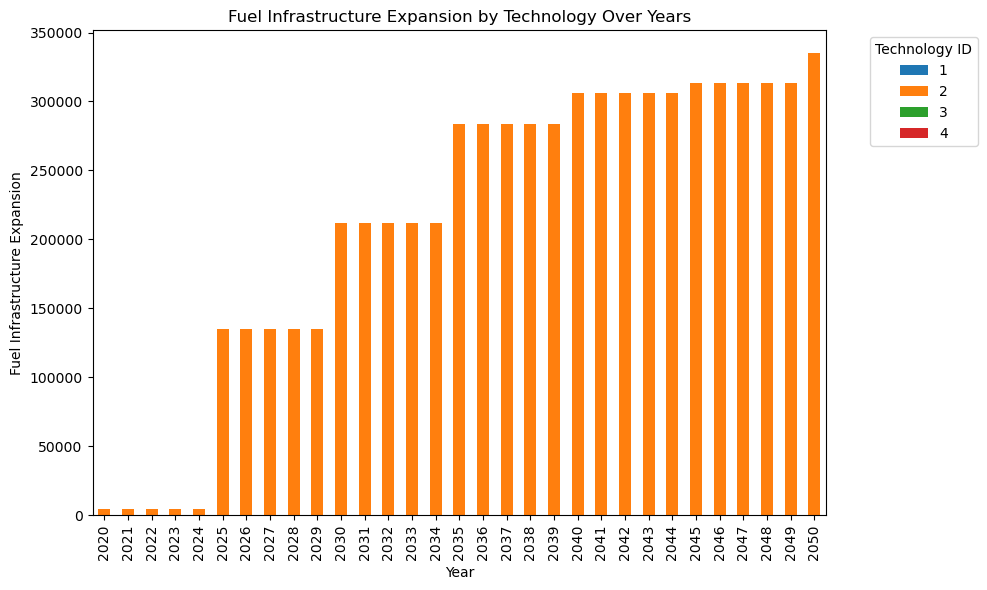

In [1208]:
q_plus_by_tech = get_fuel_infr_plus()

fig, ax = plt.subplots(figsize=(10, 6))

years = range(y_init, Y_end + 1)
tech_ids = list(technology_list.keys())

# Prepare data for stacked bar plot
data = {year: [q_plus_by_tech.get((year, tech_id), 0) for tech_id in tech_ids] for year in years}
df = pd.DataFrame(data, index=tech_ids).T

# Plotting
df.plot(kind='bar', stacked=True, ax=ax)
ax.set_xlabel('Year')
ax.set_ylabel('Fuel Infrastructure Expansion')
ax.set_title('Fuel Infrastructure Expansion by Technology Over Years')
plt.legend(title='Technology ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

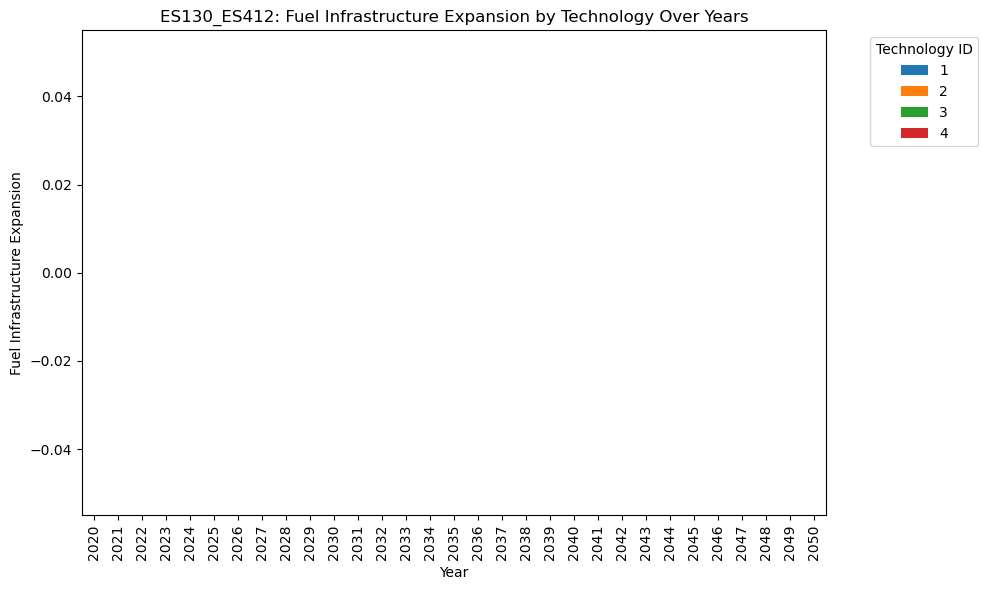

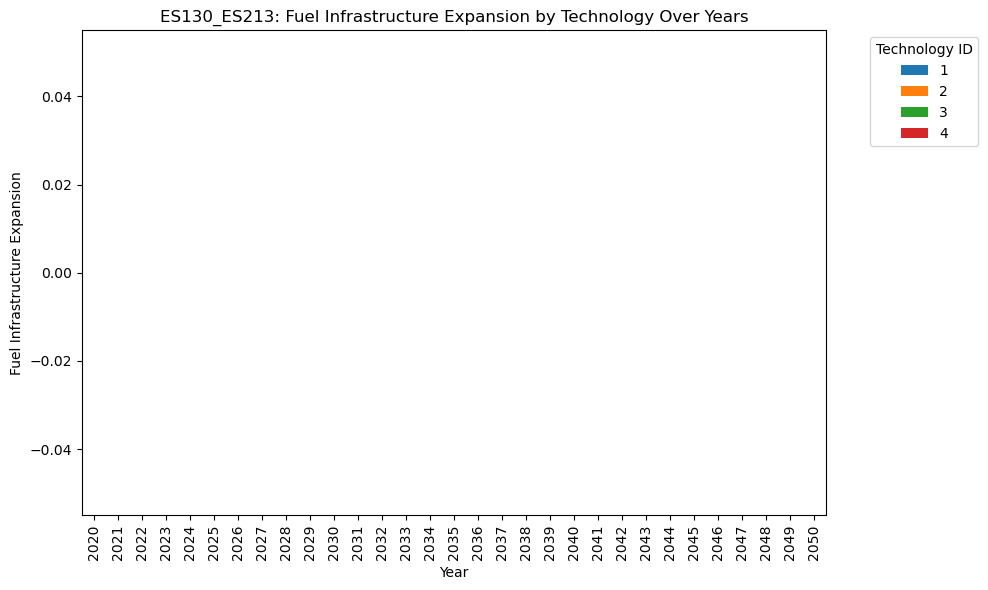

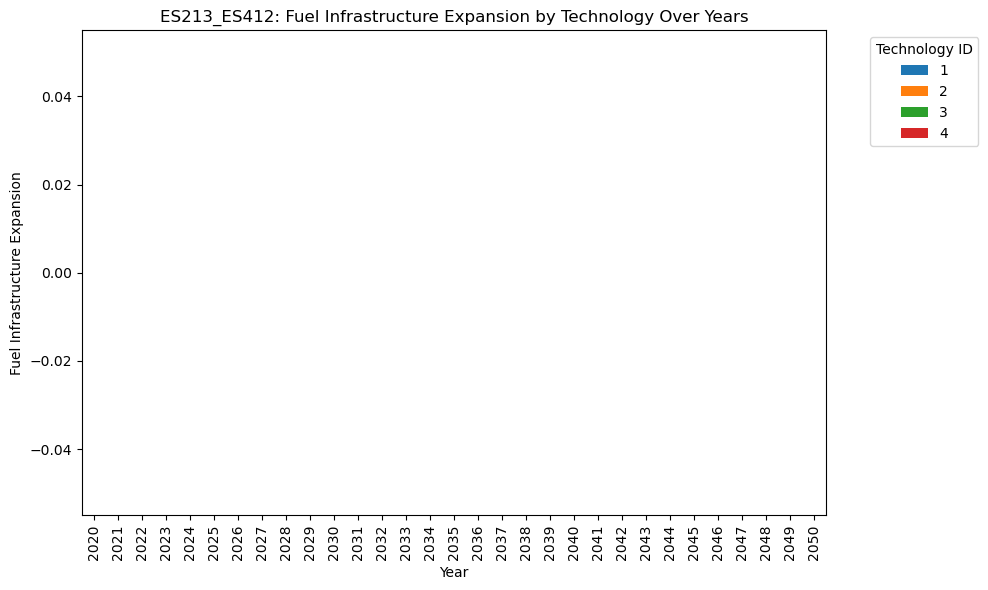

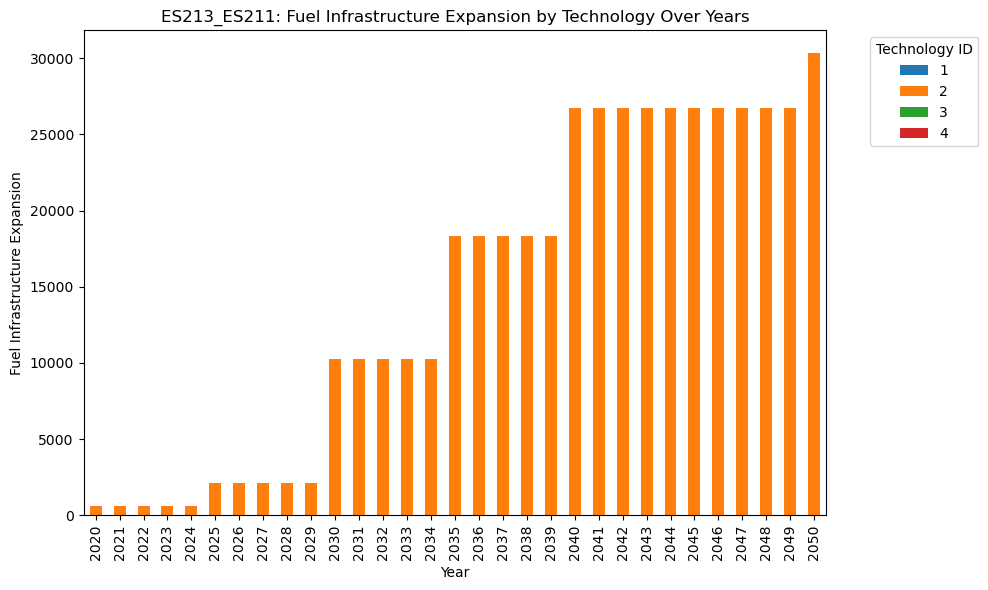

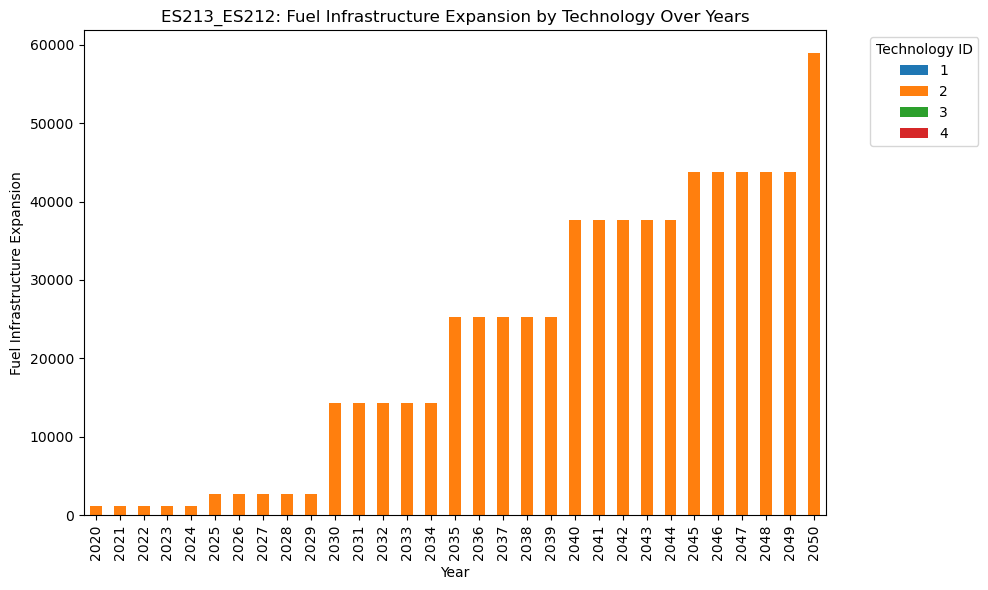

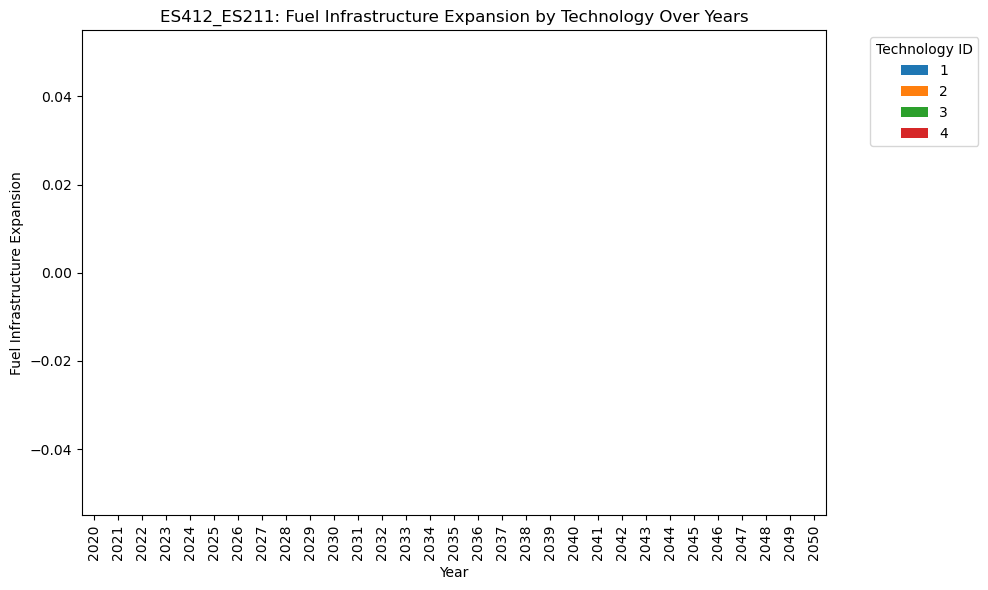

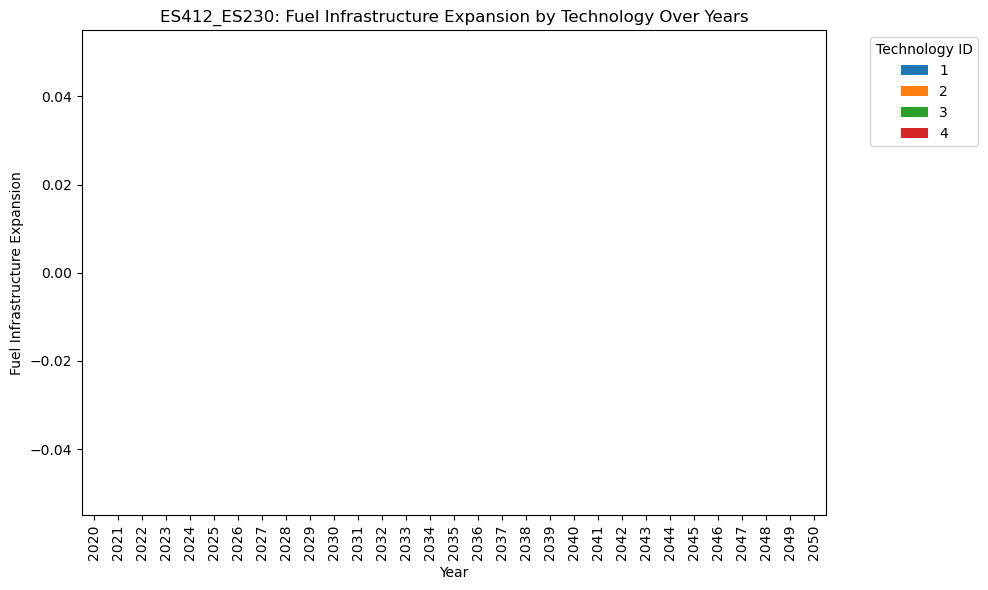

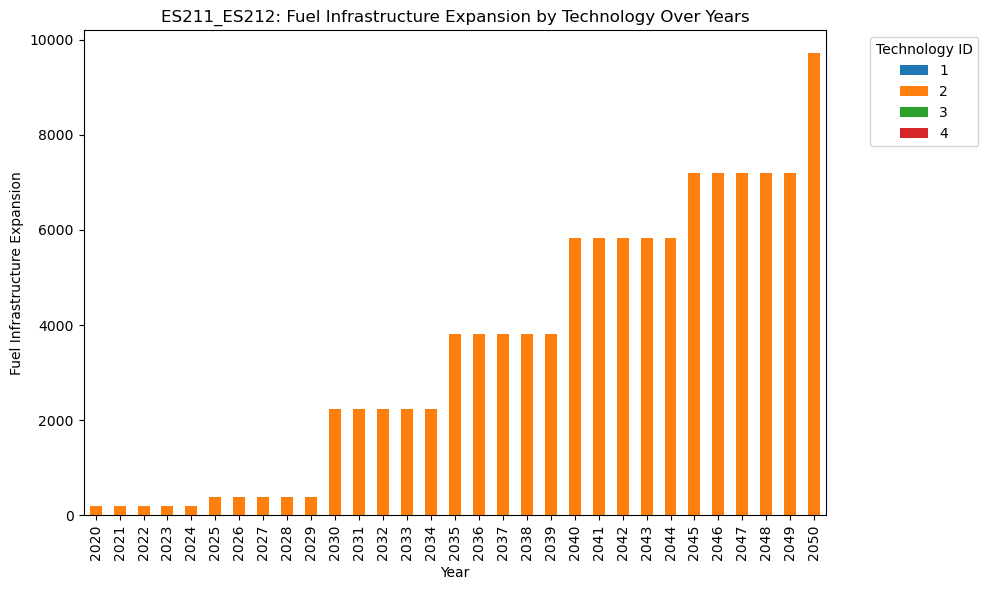

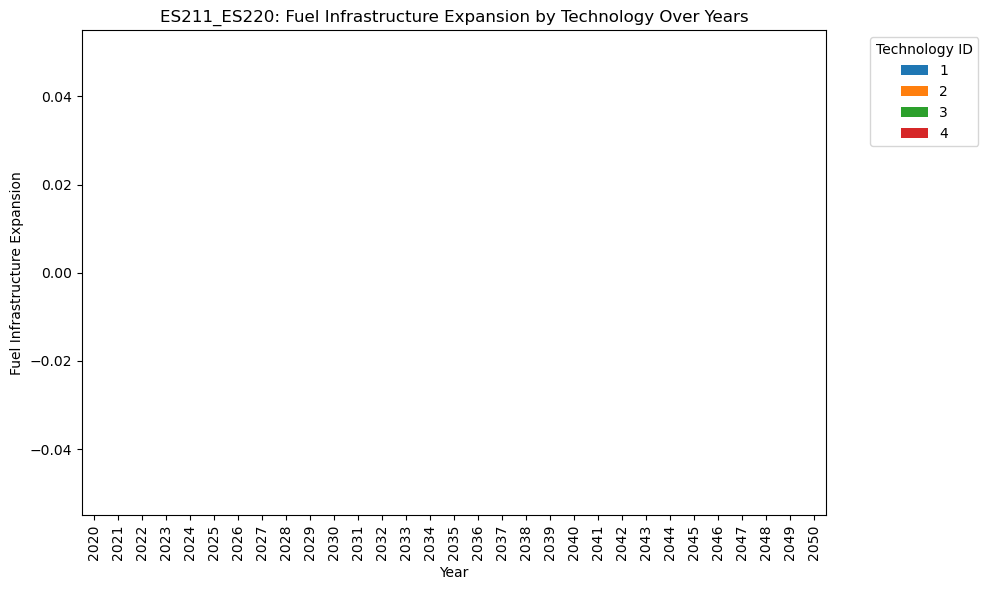

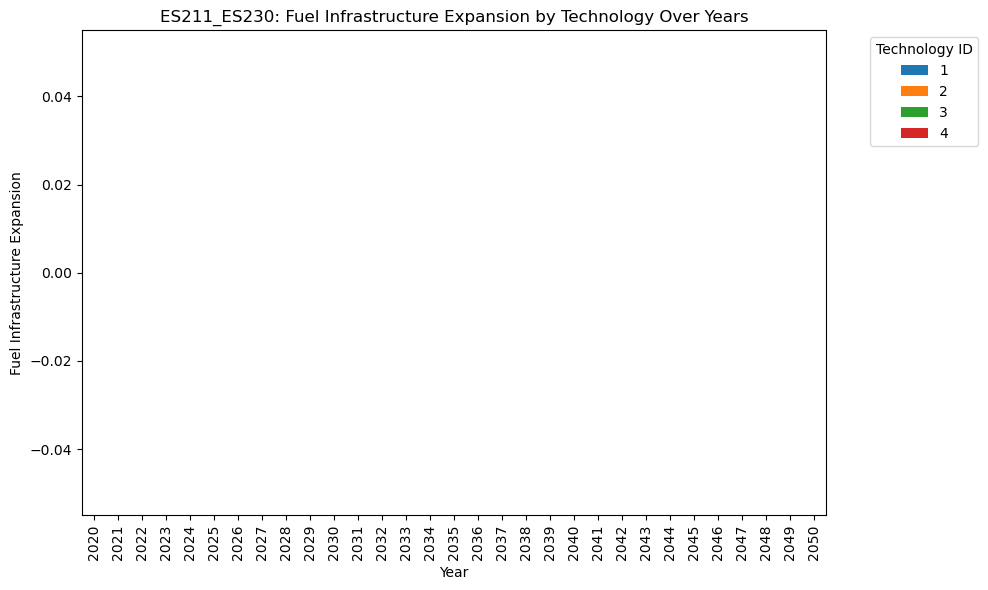

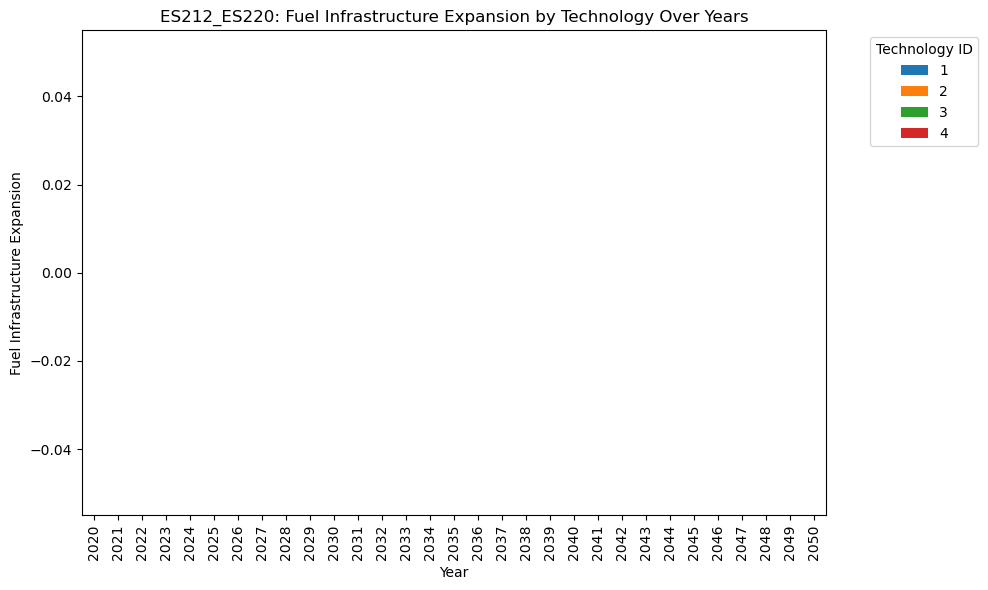

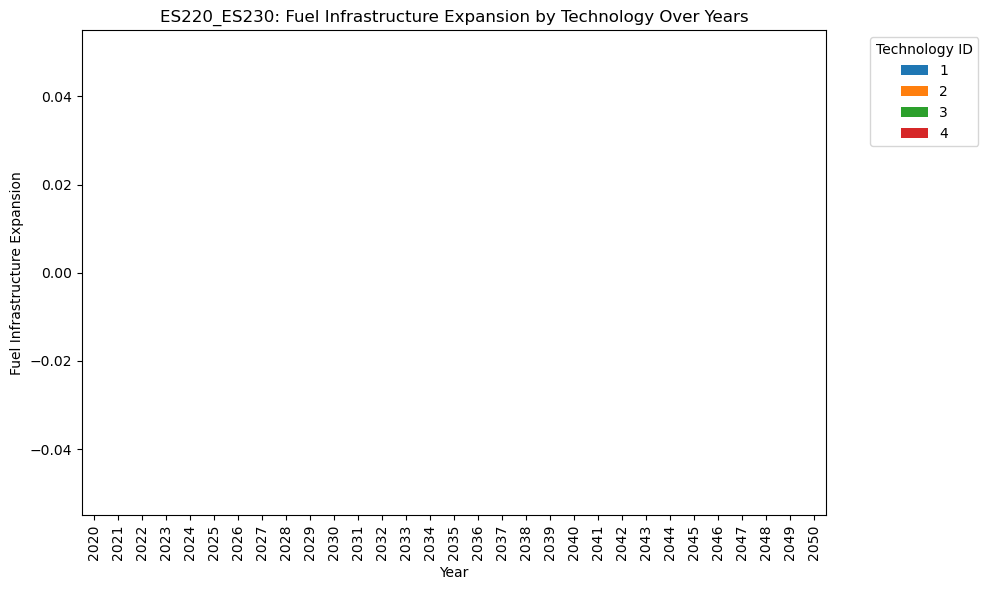

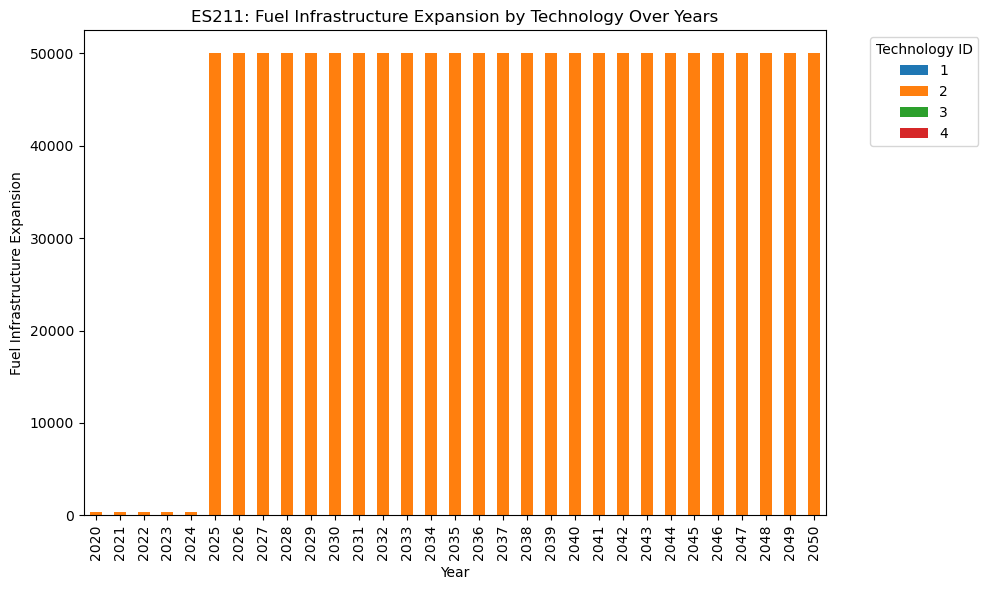

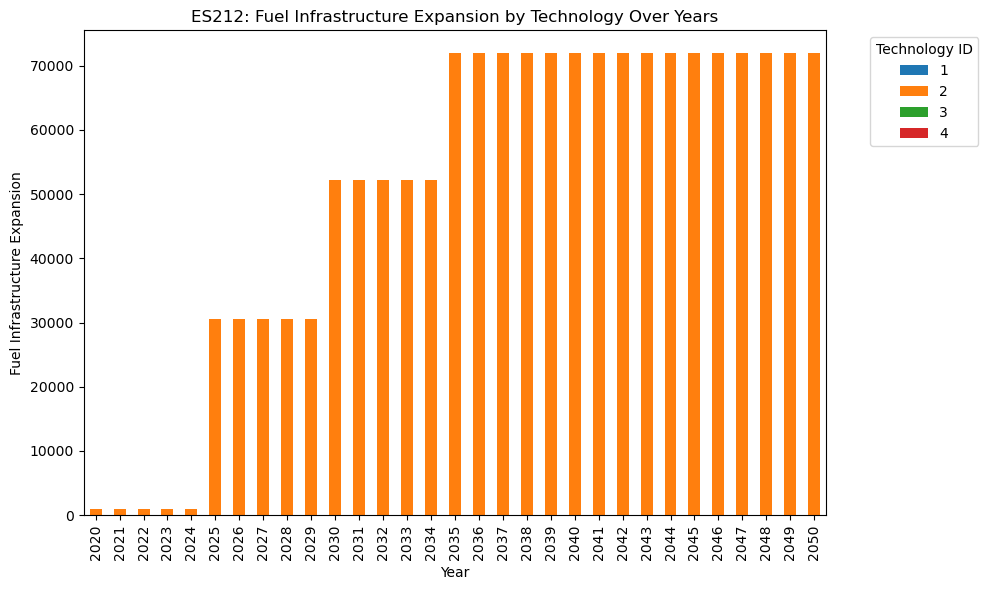

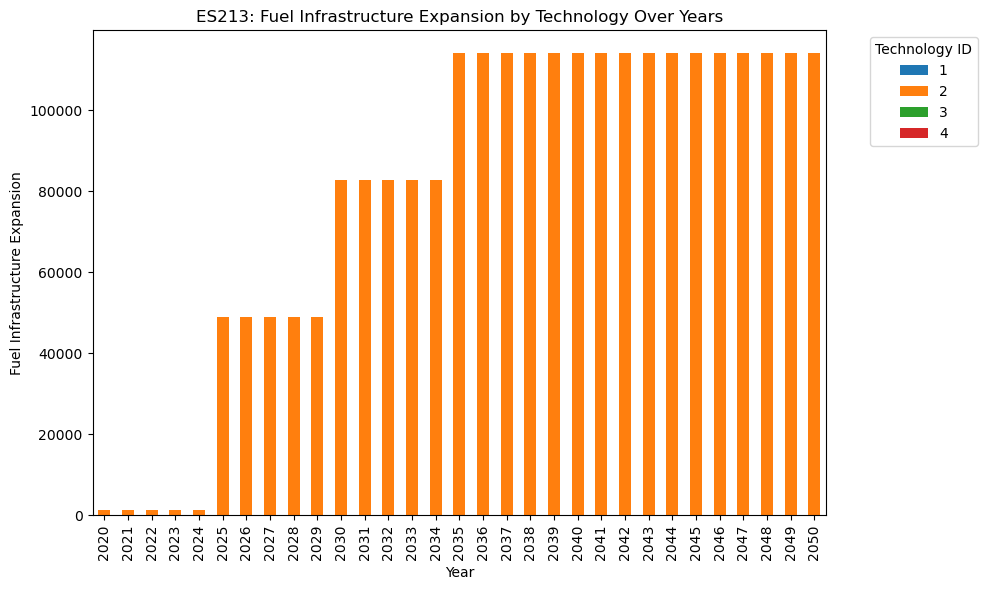

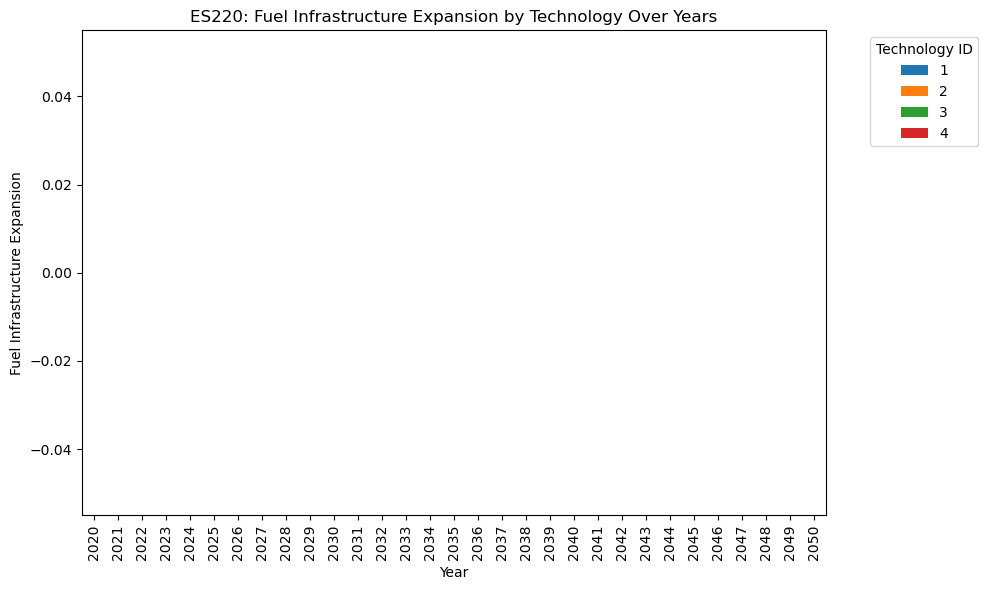

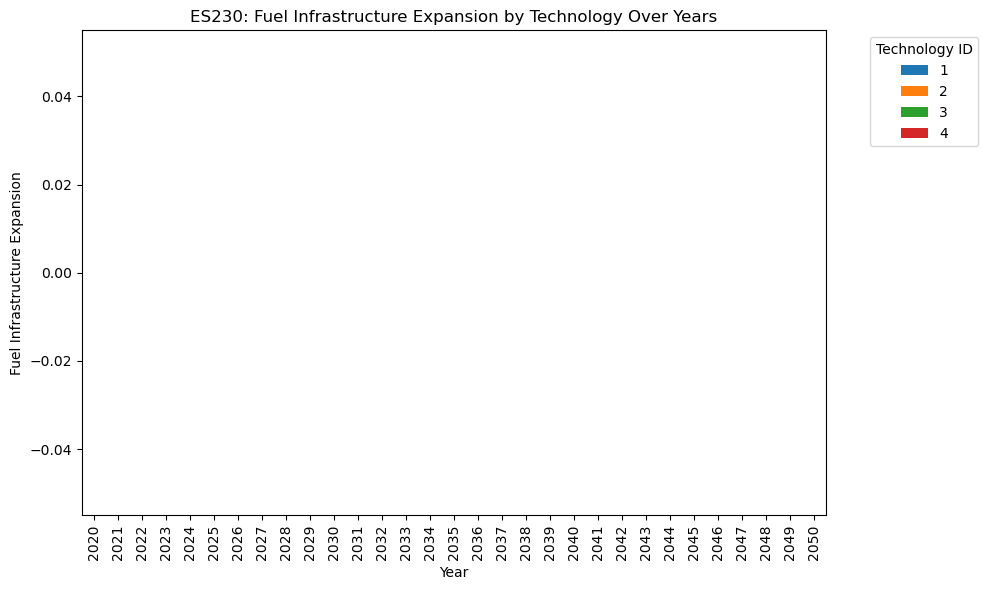

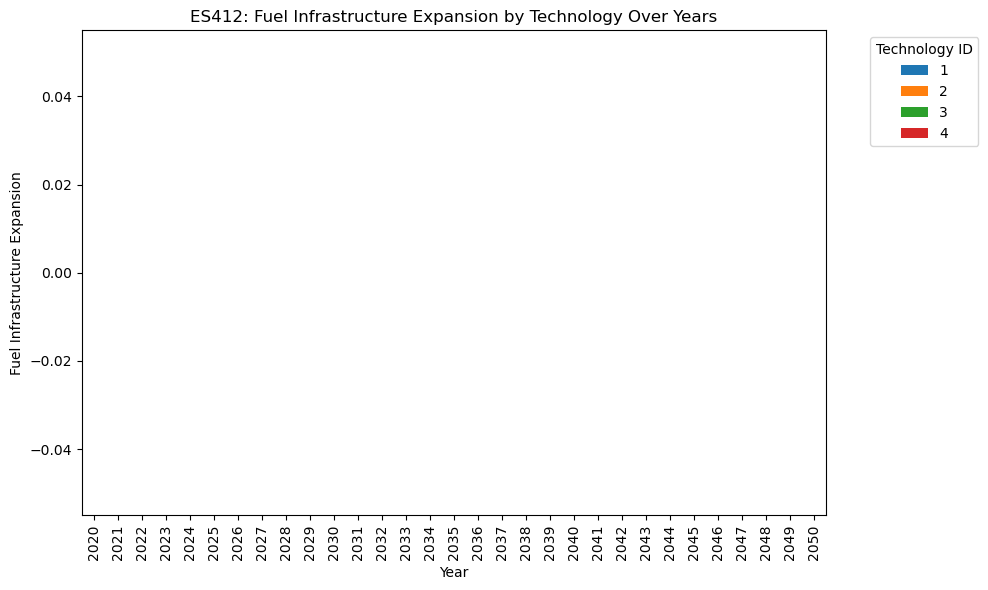

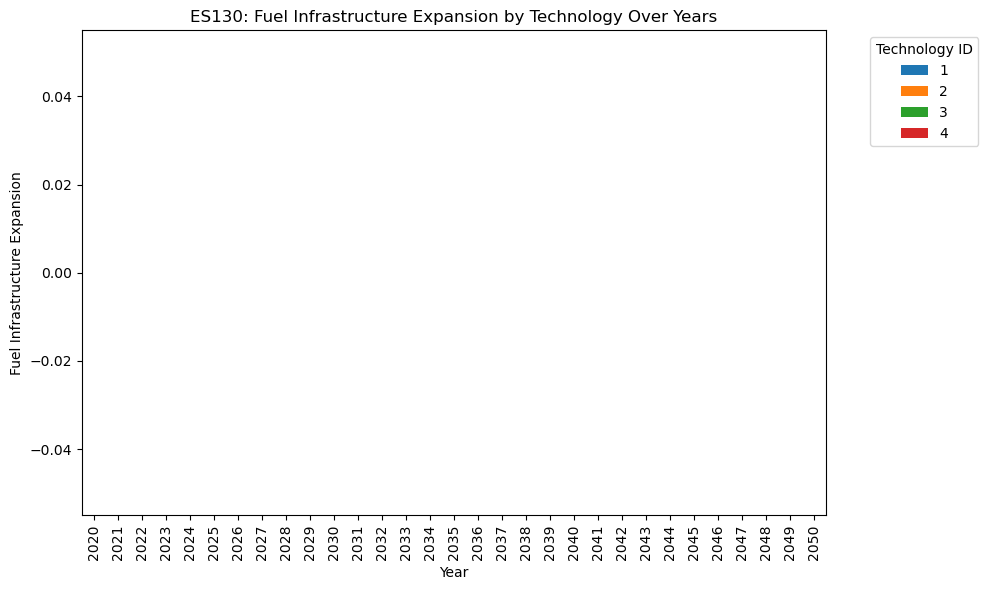

In [1209]:
# for each geom_item

geometric_element_list = input_data["GeographicElement"]

geometric_element_list = {item["id"]: item for item in geometric_element_list}

for e in geographic_element_list.keys():
    q_plus_by_tech = get_fuel_infr_plus(True, [e])

    fig, ax = plt.subplots(figsize=(10, 6))

    years = range(y_init, Y_end + 1)
    tech_ids = list(technology_list.keys())

    # Prepare data for stacked bar plot
    data = {year: [q_plus_by_tech.get((year, tech_id), 0) for tech_id in tech_ids] for year in years}
    df = pd.DataFrame(data, index=tech_ids).T

    # Plotting
    df.plot(kind='bar', stacked=True, ax=ax)
    ax.set_xlabel('Year')
    ax.set_ylabel('Fuel Infrastructure Expansion')
    ax.set_title(str(geographic_element_list[e]["name"]) + ': Fuel Infrastructure Expansion by Technology Over Years')
    plt.legend(title='Technology ID', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

In [1210]:
# installed cap per e 

geometric_element_list = input_data["GeographicElement"]

geometric_element_list = {item["id"]: item for item in geometric_element_list}
for e in geographic_element_list.keys():
    for fuel in fuel_list.keys():
        total_expansion_per_y = sum(q_fuel_infr_plus[(y, fuel, e)] for y in range(y_init, Y_end+1) if (y, fuel, e) in q_fuel_infr_plus.keys())
        if geographic_element_list[e]["name"] in ["ES213", "ES211", "ES212"]:
            print(geographic_element_list[e]["name"], fuel_list[fuel]["name"], total_expansion_per_y)


ES211 diesel 0.0
ES211 electricity 50000.0
ES212 diesel 0.0
ES212 electricity 71900.433839
ES213 diesel 0.0
ES213 electricity 114028.59896599999


In [1211]:
def get_s_per_year_and_tech(tech_id_list = ["diesel", "electricity"]):
    s_per_year_and_tech = {}

    for t in tech_id_list:
        for y in range(y_init, Y_end + 1):
            total_s_per_y = sum(s[(y, (1, r, odpair_list[r]["path_id"], e), tv)] for r in odpair_list.keys() for tv in technology_list.keys() for e in geographic_element_list.keys() if (y, (1, r, odpair_list[r]["path_id"], e), tv) in s.keys() and technology_list[techvehicle_list[tv]["technology"]]["fuel"] in (tech_id_list))
            s_per_year_and_tech[(y, t)] = total_s_per_y
    return s_per_year_and_tech


In [1212]:
energy_fueled_diesel = get_s_per_year_and_tech(tech_id_list=["diesel"])
energy_fueled_electricity = get_s_per_year_and_tech(tech_id_list=["electricity"])
print(energy_fueled_diesel)
print(energy_fueled_electricity)

{(2020, 'diesel'): 234548.478552, (2021, 'diesel'): 887317541.7142, (2022, 'diesel'): 1061620777.4803, (2023, 'diesel'): 1086691329.782109, (2024, 'diesel'): 1116049736.033154, (2025, 'diesel'): 1124425814.894116, (2026, 'diesel'): 1119123703.073045, (2027, 'diesel'): 1052717416.303575, (2028, 'diesel'): 1028512311.496039, (2029, 'diesel'): 994098437.6365, (2030, 'diesel'): 908360670.243635, (2031, 'diesel'): 841609707.442199, (2032, 'diesel'): 779284384.386221, (2033, 'diesel'): 662229890.977792, (2034, 'diesel'): 720408575.630011, (2035, 'diesel'): 694843677.696297, (2036, 'diesel'): 602975418.40435, (2037, 'diesel'): 569588922.919612, (2038, 'diesel'): 543260789.958146, (2039, 'diesel'): 604608795.040787, (2040, 'diesel'): 419686535.286078, (2041, 'diesel'): 186691101.504885, (2042, 'diesel'): 186691101.504885, (2043, 'diesel'): 186691101.504885, (2044, 'diesel'): 186691101.504885, (2045, 'diesel'): 315553500.53453, (2046, 'diesel'): 451443720.610306, (2047, 'diesel'): 591654057.795

In [1213]:
# check total investments per technology
data = {year: [q_plus_by_tech.get((year, tech_id), 0) for tech_id in tech_ids if tech_id == 1] for year in years}
print(data)


{2020: [0.0], 2021: [0.0], 2022: [0.0], 2023: [0.0], 2024: [0.0], 2025: [0.0], 2026: [0.0], 2027: [0.0], 2028: [0.0], 2029: [0.0], 2030: [0.0], 2031: [0.0], 2032: [0.0], 2033: [0.0], 2034: [0.0], 2035: [0.0], 2036: [0.0], 2037: [0.0], 2038: [0.0], 2039: [0.0], 2040: [0.0], 2041: [0.0], 2042: [0.0], 2043: [0.0], 2044: [0.0], 2045: [0.0], 2046: [0.0], 2047: [0.0], 2048: [0.0], 2049: [0.0], 2050: [0.0]}


In [1214]:
# check tech_shift 
def get_f_per_tech(tech_id_list = ["diesel", "electricity"]):
    f_per_tech_and_year = {}
    for t in tech_id_list:
        for y in range(y_init, Y_end + 1):
            total_activity_per_tech = sum(f[(y, (1, r, odpair_list[r]["path_id"]), (1, tv), g)] for r in odpair_list.keys() for tv in techvehicle_list.keys() for g in range(g_init, y + 1) if (y, (1, r, odpair_list[r]["path_id"]), (1, tv), g) in f.keys() and technology_list[techvehicle_list[tv]["technology"]]["fuel"] in tech_id_list)
            f_per_tech_and_year[(y, t)] = total_activity_per_tech
    return f_per_tech_and_year

In [1215]:
f_per_tech_diesel = get_f_per_tech(tech_id_list=["diesel"])
f_per_tech_electricity = get_f_per_tech(tech_id_list=["electricity"])
print(f_per_tech_diesel)
print(f_per_tech_electricity)

{(2020, 'diesel'): 422126785.346263, (2021, 'diesel'): 403318006.004409, (2022, 'diesel'): 384343796.48874, (2023, 'diesel'): 367931583.227932, (2024, 'diesel'): 351146370.839315, (2025, 'diesel'): 333033321.045301, (2026, 'diesel'): 318943868.25242, (2027, 'diesel'): 305138562.728672, (2028, 'diesel'): 289510400.978168, (2029, 'diesel'): 274242952.457414, (2030, 'diesel'): 259329759.574039, (2031, 'diesel'): 242881702.39535, (2032, 'diesel'): 226916551.144986, (2033, 'diesel'): 212532152.508811, (2034, 'diesel'): 199109226.837511, (2035, 'diesel'): 184506900.572191, (2036, 'diesel'): 170369284.242113, (2037, 'diesel'): 158720303.699288, (2038, 'diesel'): 151247446.465824, (2039, 'diesel'): 152379833.639175, (2040, 'diesel'): 155001475.249478, (2041, 'diesel'): 157877935.17419901, (2042, 'diesel'): 155396970.228119, (2043, 'diesel'): 145834882.422463, (2044, 'diesel'): 133515603.215529, (2045, 'diesel'): 121531570.885573, (2046, 'diesel'): 109875849.917545, (2047, 'diesel'): 99010045.4

In [1216]:
def get_f_by_mode(mode_list=[1, 2]):
    f_per_mode = {}
    for m in mode_list:
        for y in range(y_init, Y_end + 1):
            total_activity_per_tech = sum(f[(y, (1, r, odpair_list[r]["path_id"]), (m, tv), g)] for r in odpair_list.keys() for tv in range(1, max(techvehicle_list.keys()) + 2) for g in range(g_init, y + 1) if (y, (1, r, odpair_list[r]["path_id"]), (m, tv), g) in f.keys())
            f_per_mode[(y, m)] = total_activity_per_tech
    return f_per_mode

In [1217]:
f_per_mode_1 = get_f_by_mode(mode_list=[1])
f_per_mode_2 = get_f_by_mode(mode_list=[2])
print(f_per_mode_1)
print(f_per_mode_2)


{(2020, 1): 2954841.730403, (2021, 1): 85039044.41154, (2022, 1): 111343860.80297, (2023, 1): 120872490.213677, (2024, 1): 131295473.500608, (2025, 1): 147774180.112197, (2026, 1): 159156557.357571, (2027, 1): 164569034.887857, (2028, 1): 174642494.520922, (2029, 1): 184747635.922228, (2030, 1): 189944645.922666, (2031, 1): 197047497.598542, (2032, 1): 203837175.412774, (2033, 1): 204421946.50710002, (2034, 1): 218086463.819794, (2035, 1): 230534732.282129, (2036, 1): 238580506.307843, (2037, 1): 245421770.964661, (2038, 1): 246367861.301931, (2039, 1): 246033698.672384, (2040, 1): 249674669.773677, (2041, 1): 268358039.077163, (2042, 1): 304663907.468403, (2043, 1): 331550748.84156, (2044, 1): 346936285.854901, (2045, 1): 345845689.982513, (2046, 1): 344697267.835519, (2047, 1): 345609782.774902, (2048, 1): 345760333.721904, (2049, 1): 345162459.858323, (2050, 1): 343953990.864321}
{(2020, 2): 0, (2021, 2): 0, (2022, 2): 0, (2023, 2): 0, (2024, 2): 0, (2025, 2): 0, (2026, 2): 0, (2027

In [1218]:
f_per_tech = get_f_per_tech()
print(f_per_tech)
print(fuel_list)
print(od_pair_list_by_year)
print(technology_list.keys())
for y in range(y_init, Y_end + 1):
    val1 = sum(f_per_tech[(y, fuel_list[f]["name"])] for f in fuel_list.keys())
    val2 = od_pair_list_by_year[y]
    print(f"Year: {y}", val1, val2, val1 - val2, val1 >= val2)




{(2020, 'diesel'): 424685503.335674, (2021, 'diesel'): 424096850.928153, (2022, 'diesel'): 423504994.488533, (2023, 'diesel'): 421525929.716651, (2024, 'diesel'): 419640464.18452, (2025, 'diesel'): 418550450.319013, (2026, 'diesel'): 416299905.247347, (2027, 'diesel'): 413624892.102148, (2028, 'diesel'): 410154334.640362, (2029, 'diesel'): 407955183.097183, (2030, 'diesel'): 405621323.534895, (2031, 'diesel'): 402023610.698958, (2032, 'diesel'): 398214566.78221, (2033, 'diesel'): 394357173.143164, (2034, 'diesel'): 390446734.346994, (2035, 'diesel'): 386497191.162859, (2036, 'diesel'): 382552926.746165, (2037, 'diesel'): 378577722.804452, (2038, 'diesel'): 374230226.623273, (2039, 'diesel'): 369608089.689697, (2040, 'diesel'): 365624457.537844, (2041, 'diesel'): 361252177.454541, (2042, 'diesel'): 356042794.212027, (2043, 'diesel'): 350777016.284034, (2044, 'diesel'): 346936285.854901, (2045, 'diesel'): 345845689.982513, (2046, 'diesel'): 344697267.835519, (2047, 'diesel'): 345609782.7

In [1219]:
mode_list = input_data["Mode"]
mode_list = {item["id"]: item for item in mode_list}
product_list = input_data["Product"]
product_list = {item["id"]: item for item in product_list}
vehicle_type_list = input_data["Vehicletype"]
vehicle_type_list = {item["name"]: item for item in vehicle_type_list}
path_list = input_data["Path"]
path_list = {item["id"]: item for item in path_list}

for y in range(y_init, 2022):
    for r in range(1, 4):
        val1 = sum(f[(y, (p, r, odpair_list[r]["path_id"]), (mode_id, tv), g)] for mode_id in [1, 2] for p in product_list.keys() for r in odpair_list.keys() for tv in range(0, 5) for g in range(g_init, y + 1) if (y, (p, r, odpair_list[r]["path_id"]), (mode_id, tv), g) in f.keys())
        val2 = odpair_list[r]["F"][y - y_init]
        print(f"Year: {y}, Odpair: {r}", val1, val2, val1 - val2)


Year: 2020, Odpair: 1 424290807.555717 5060282.0 419230525.555717
Year: 2020, Odpair: 2 424290807.555717 5060282.0 419230525.555717
Year: 2020, Odpair: 3 424290807.555717 5060282.0 419230525.555717
Year: 2021, Odpair: 1 424096850.928153 5060282.0 419036568.928153
Year: 2021, Odpair: 2 424096850.928153 5060282.0 419036568.928153
Year: 2021, Odpair: 3 424096850.928153 5060282.0 419036568.928153


## Mode shift

- by trip
- by pkm

In [1220]:
F_sum = 0
mode_list = input_data["Mode"]
mode_list = {item["id"]: item for item in mode_list}
product_list = input_data["Product"]
product_list = {item["id"]: item for item in product_list}
vehicle_type_list = input_data["Vehicletype"]
vehicle_type_list = {item["name"]: item for item in vehicle_type_list}
path_list = input_data["Path"]
path_list = {item["id"]: item for item in path_list}
print(path_list)
activity_per_mode =  {}
financial_status_list = ["Commercial", "First quintile", "Second quintile", "Third quintile", "Fourth quintile", "Fifth quintile"]
# financial_status_list = ["Commercial"]

activity_per_mode_pkm = {}
for mode in mode_list.keys():
    mode_id = mode_list[mode]["id"]
    mode_name = mode_list[mode]["name"]

    for y in range(y_init, Y_end):
        total_activity_per_mode = sum(f[(y, (p, r, odpair_list[r]["path_id"]), (mode_id, tv), g)] for p in product_list.keys() for r in odpair_list.keys() for tv in range(0, len(odpair_list)) for g in range(g_init, y + 1) if (y, (p, r, odpair_list[r]["path_id"]), (mode_id, tv), g) in f.keys() and odpair_list[r]["financial_status"] in financial_status_list)
        
        total_activity_per_mode_pkm = sum(f[(y, (p, r, odpair_list[r]["path_id"]), (mode_id, tv), g)] * path_list[odpair_list[r]["path_id"]]["length"] for p in product_list.keys() for r in odpair_list.keys() for tv in range(0, 17) for g in range(g_init, y + 1) if (y, (p, r, odpair_list[r]["path_id"]), (mode_id, tv), g) in f.keys() and odpair_list[r]["financial_status"] in financial_status_list)
        if y == 2020:
            F_sum = total_activity_per_mode_pkm + F_sum
        total_pkm = sum(path_list[odpair_list[r]["path_id"]]["length"] for p in product_list.keys() for r in odpair_list.keys() for tv in range(0, 17) for g in range(g_init, y + 1) if (y, (p, r, odpair_list[r]["path_id"]), (mode_id, tv), g) in f.keys() and odpair_list[r]["financial_status"] in financial_status_list)
        activity_per_mode[(y, mode_id)] = total_activity_per_mode
        activity_per_mode_pkm[(y, mode_id)] = total_activity_per_mode_pkm
        print("Year:", y, "Mode:", mode_name, "Activity:", total_activity_per_mode, "Activity pkm:", total_activity_per_mode_pkm, total_pkm)

print("F_sum:", F_sum)


{0: {'id': 0, 'length': 28.0, 'name': '0', 'sequence': [12]}, 1: {'id': 1, 'length': 32.0, 'name': '1', 'sequence': [12]}, 2: {'id': 2, 'length': 36.0, 'name': '2', 'sequence': [12]}, 3: {'id': 3, 'length': 92.0, 'name': '3', 'sequence': [12]}, 4: {'id': 4, 'length': 32.0, 'name': '4', 'sequence': [12]}, 5: {'id': 5, 'length': 48.0, 'name': '5', 'sequence': [12]}, 6: {'id': 6, 'length': 396.0, 'name': '6', 'sequence': [13, 7, 12]}, 7: {'id': 7, 'length': 28.0, 'name': '7', 'sequence': [13]}, 8: {'id': 8, 'length': 32.0, 'name': '8', 'sequence': [13]}, 9: {'id': 9, 'length': 36.0, 'name': '9', 'sequence': [13]}, 10: {'id': 10, 'length': 92.0, 'name': '10', 'sequence': [13]}, 11: {'id': 11, 'length': 32.0, 'name': '11', 'sequence': [13]}, 12: {'id': 12, 'length': 48.0, 'name': '12', 'sequence': [13]}, 13: {'id': 13, 'length': 396.0, 'name': '13', 'sequence': [12, 7, 13]}, 14: {'id': 14, 'length': 388.0, 'name': '14', 'sequence': [14, 4, 13]}, 15: {'id': 15, 'length': 252.0, 'name': '15',

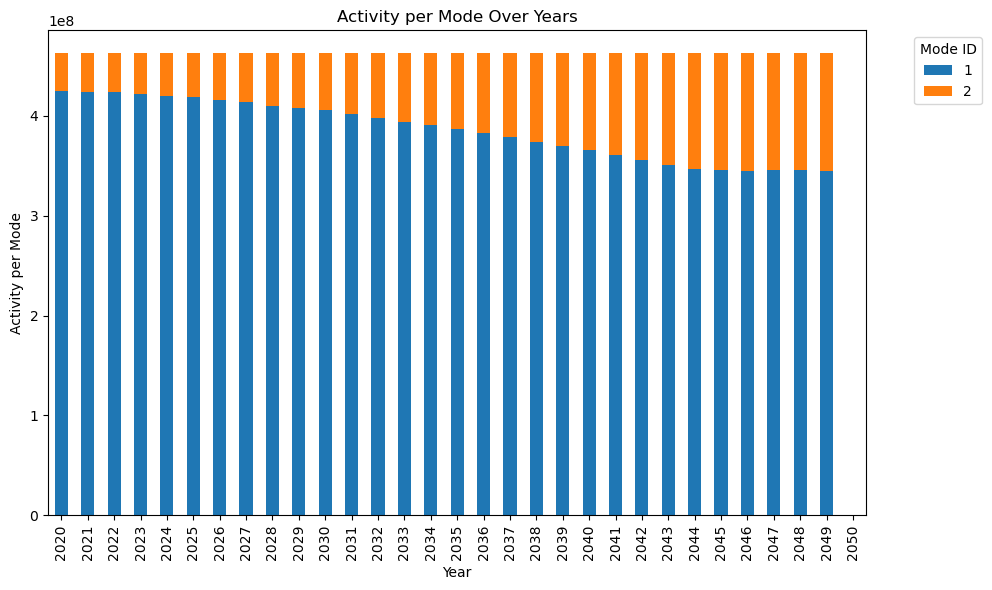

{(2020, 1): 424685503.335674,
 (2021, 1): 424096850.928153,
 (2022, 1): 423504994.488533,
 (2023, 1): 421525929.716651,
 (2024, 1): 419640464.18452,
 (2025, 1): 418550450.319013,
 (2026, 1): 416299905.247347,
 (2027, 1): 413624892.102148,
 (2028, 1): 410154334.640362,
 (2029, 1): 407955183.097183,
 (2030, 1): 405621323.534895,
 (2031, 1): 402023610.698958,
 (2032, 1): 398214566.78221,
 (2033, 1): 394357173.143164,
 (2034, 1): 390446734.346994,
 (2035, 1): 386497191.162859,
 (2036, 1): 382552926.746165,
 (2037, 1): 378577722.804452,
 (2038, 1): 374230226.623273,
 (2039, 1): 369608089.689697,
 (2040, 1): 365624457.537844,
 (2041, 1): 361252177.454541,
 (2042, 1): 356042794.212027,
 (2043, 1): 350777016.284034,
 (2044, 1): 346936285.854901,
 (2045, 1): 345845689.982513,
 (2046, 1): 344697267.835519,
 (2047, 1): 345609782.774902,
 (2048, 1): 345760333.721904,
 (2049, 1): 345162459.858323,
 (2020, 2): 37914012.664351,
 (2021, 2): 38502665.071876,
 (2022, 2): 39094521.511501,
 (2023, 2): 410

In [1221]:

fig, ax = plt.subplots(figsize=(10, 6))

years = range(y_init, Y_end + 1)
mode_ids = list(set(mode_id for _, mode_id in activity_per_mode.keys()))

# Prepare data for stacked bar plot
data = {year: [activity_per_mode.get((year, mode_id), 0) for mode_id in mode_ids] for year in years}
df = pd.DataFrame(data, index=mode_ids).T

# Plotting
df.plot(kind='bar', stacked=True, ax=ax)
ax.set_xlabel('Year')
ax.set_ylabel('Activity per Mode')
ax.set_title('Activity per Mode Over Years')
plt.legend(title='Mode ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
activity_per_mode


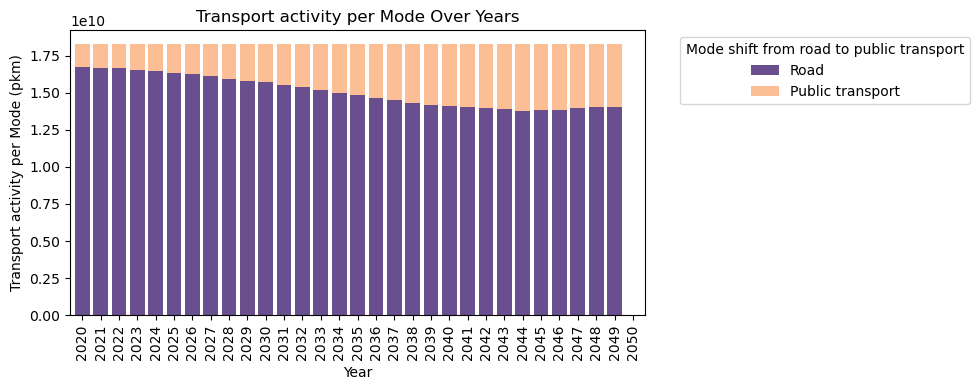

818416.759933252
16728438573.035671


In [1222]:
mode_names = {1: "Road", 2: "Public transport"}

fig, ax = plt.subplots(figsize=(10, 4))

years = range(y_init, Y_end + 1)
mode_ids = list(set(mode_id for _, mode_id in activity_per_mode_pkm.keys()))

# Prepare data for stacked bar plot
data = {year: [activity_per_mode_pkm.get((year, mode_id), 0) for mode_id in mode_ids] for year in years}
df = pd.DataFrame(data, index=mode_ids).T

# Plotting
df.plot(kind='bar', stacked=True, ax=ax, color = ["#432371", "#faae7b"], alpha=0.8, width=0.8)
ax.set_xlabel('Year')
ax.set_ylabel('Transport activity per Mode (pkm)')
ax.set_title('Transport activity per Mode Over Years')
ax.legend(
    labels=[mode_names[mode_id] for mode_id in mode_ids],
    title='Mode shift from road to public transport',
    bbox_to_anchor=(1.05, 1),
    loc='upper left'
)
plt.tight_layout()
plt.savefig(os.path.normpath(file_results + "/" + case_study_name + "_activity_per_mode_pkm.png"), transparent=True)
plt.show()
print(activity_per_mode_pkm[(2020, 1)]/ (1.4 * 14600))
print(activity_per_mode_pkm[(2020, 1)])

In [1223]:
print(mode_list.keys())

dict_keys([1, 2])


In [1224]:
geometric_element_list = input_data["GeographicElement"]

geometric_element_list_by_id = {item["id"]: item for item in geometric_element_list}
geometric_element_list_by_name = {item["name"]: item for item in geometric_element_list}

fuel_list = input_data["Fuel"]
fuel_list_by_id = {item["id"]: item for item in fuel_list}
fuel_list_by_name = {item["name"]: item for item in fuel_list}

# Development of detour time by edge
def get_detour_time_by_edge(by_geom = False, by_fuel = False, geoms = [], fuels = []):
    if by_geom:
        geom_list = geoms
    else:
        geom_list = geometric_element_list_by_name.keys()

    if by_fuel:
        fuels_list = fuels
    else:
        fuels_list = fuel_list.keys()

    detour_time_by_edge = {}
    detour_time_at_place = {}
    for y in range(y_init, Y_end + 1):
        for e in geom_list:
            for fuel in fuels_list:
                tot_veh = 0
                fuel_id = fuel_list_by_name[fuel]["id"]
                for r in odpair_list.keys():
                    # if (y, geometric_element_list_by_name[e]["id"], (1, r, odpair_list[r]["path_id"]), fuel_list_by_name[fuel]["id"]) in detour_time.keys():
                    fueling_vehs = n_fueling[(y, (1, r, odpair_list[r]["path_id"], geometric_element_list_by_name[e]["id"]), fuel_id)]
                        # print(r, fueling_vehs)
                    tot_veh = tot_veh + fueling_vehs
                        # total_detour_time_per_y = sum(detour_time[(y, geometric_element_list_by_name[e]["id"], (1, r, odpair_list[r]["path_id"]), fuel_list_by_name[fuel]["id"])])
                        # detour_time_by_edge[(y, geometric_element_list_by_name[e]["id"], fuel)] = total_detour_time_per_y
                print (y, tot_veh)
                total_detour_time_per_y = sum(detour_time[(y, (p, r, odpair_list[r]["path_id"], geometric_element_list_by_name[e]["id"]), fuel_list_by_name[fuel]["id"])] for r in odpair_list.keys() for p in product_list.keys() if (y, (p, r, odpair_list[r]["path_id"], geometric_element_list_by_name[e]["id"]), fuel_list_by_name[fuel]["id"]) in detour_time.keys())
                if not tot_veh == 0:

                    detour_time_av = total_detour_time_per_y / tot_veh
                else:
                    detour_time_av = 0
                detour_time_by_edge[(y, geometric_element_list_by_name[e]["id"], fuel)] = total_detour_time_per_y
                detour_time_at_place[(y, geometric_element_list_by_name[e]["id"], fuel)] = detour_time_av
    return detour_time_by_edge, detour_time_at_place

In [1225]:
# electricity 
# getting detour time 
detour_time_by_edge, detour_time_at_place = get_detour_time_by_edge(by_geom=True, by_fuel=True, geoms=["ES211"], fuels=["electricity"])

for k in detour_time_at_place.keys():
    print(k, detour_time_at_place[k])
print(detour_time_at_place)

NameError: name 'n_fueling' is not defined

In [ ]:
# diesel
detour_time_by_edge, detour_time_by_place = get_detour_time_by_edge(by_geom=True, by_fuel=True, geoms=["ES211"], fuels=["diesel"])

for k in detour_time_at_place.keys():
    print(k, detour_time_at_place[k])
print(detour_time_at_place)

2020 0
2021 0
2022 0
2023 0
2024 0
2025 0
2026 0
2027 0
2028 0
2029 0
2030 0
2031 0
2032 0
2033 0
2034 0
2035 0
2036 0
2037 0
2038 0
2039 0
2040 0
2041 0
2042 0
2043 0
2044 0
2045 0
2046 0
2047 0
2048 0
2049 0
2050 0
(2020, 12, 'electricity') 0
(2021, 12, 'electricity') 0
(2022, 12, 'electricity') 0
(2023, 12, 'electricity') 0
(2024, 12, 'electricity') 0
(2025, 12, 'electricity') 0
(2026, 12, 'electricity') 0
(2027, 12, 'electricity') 0
(2028, 12, 'electricity') 0
(2029, 12, 'electricity') 0
(2030, 12, 'electricity') 0
(2031, 12, 'electricity') 0
(2032, 12, 'electricity') 0
(2033, 12, 'electricity') 0
(2034, 12, 'electricity') 0
(2035, 12, 'electricity') 0
(2036, 12, 'electricity') 0
(2037, 12, 'electricity') 0
(2038, 12, 'electricity') 0
(2039, 12, 'electricity') 0
(2040, 12, 'electricity') 0
(2041, 12, 'electricity') 0
(2042, 12, 'electricity') 0
(2043, 12, 'electricity') 0
(2044, 12, 'electricity') 0
(2045, 12, 'electricity') 0
(2046, 12, 'electricity') 0
(2047, 12, 'electricity') 0

In [ ]:
geometric_element_list = input_data["GeographicElement"]

geometric_element_list_by_id = {item["id"]: item for item in geometric_element_list}
geometric_element_list_by_name = {item["name"]: item for item in geometric_element_list}

fuel_list = input_data["Fuel"]
fuel_list_by_id = {item["id"]: item for item in fuel_list}
fuel_list_by_name = {item["name"]: item for item in fuel_list}

# Development of detour time by edge
def get_nb_vehs(by_geom = False, by_fuel = False, geoms = [], fuels = []):
    if by_geom:
        geom_list = geoms
    else:
        geom_list = geometric_element_list_by_name.keys()

    if by_fuel:
        fuels_list = fuels
    else:
        fuels_list = fuel_list.keys()

    nb_vehs_fueling = {}
    detour_time_at_place = {}
    for y in range(y_init, Y_end + 1):
        for e in geom_list:
            for fuel in fuels_list:
                tot_veh = 0

                for r in odpair_list.keys():
                    if (y, geometric_element_list_by_name[e]["id"], (1, r, odpair_list[r]["path_id"]), fuel_list_by_name[fuel]["id"]) in detour_time.keys():
                        fueling_vehs = sum(n_fueling[(y, (1, r, odpair_list[r]["path_id"], e), tv)] for tv in techvehicle_list.keys() for e in geographic_element_list.keys() if (y, (1, r, odpair_list[r]["path_id"], e), tv) in n_fueling.keys() and technology_list[techvehicle_list[tv]["technology"]]["fuel"] in fuels_list)
                        # print(r, fueling_vehs)
                        tot_veh = tot_veh + fueling_vehs
                        # total_detour_time_per_y = sum(detour_time[(y, geometric_element_list_by_name[e]["id"], (1, r, odpair_list[r]["path_id"]), fuel_list_by_name[fuel]["id"])])
                        # detour_time_by_edge[(y, geometric_element_list_by_name[e]["id"], fuel)] = total_detour_time_per_y
                print (y, tot_veh)
                
                nb_vehs_fueling[(y, geometric_element_list_by_name[e]["id"], fuel)] = tot_veh
    return nb_vehs_fueling

In [ ]:
nb_vehs_fueling = get_nb_vehs(by_geom=True, by_fuel=True, geoms=["ES211"], fuels=["electricity"])
print(nb_vehs_fueling)

2020 0
2021 0
2022 0
2023 0
2024 0
2025 0
2026 0
2027 0
2028 0
2029 0
2030 0
2031 0
2032 0
2033 0
2034 0
2035 0
2036 0
2037 0
2038 0
2039 0
2040 0
2041 0
2042 0
2043 0
2044 0
2045 0
2046 0
2047 0
2048 0
2049 0
2050 0
{(2020, 12, 'electricity'): 0, (2021, 12, 'electricity'): 0, (2022, 12, 'electricity'): 0, (2023, 12, 'electricity'): 0, (2024, 12, 'electricity'): 0, (2025, 12, 'electricity'): 0, (2026, 12, 'electricity'): 0, (2027, 12, 'electricity'): 0, (2028, 12, 'electricity'): 0, (2029, 12, 'electricity'): 0, (2030, 12, 'electricity'): 0, (2031, 12, 'electricity'): 0, (2032, 12, 'electricity'): 0, (2033, 12, 'electricity'): 0, (2034, 12, 'electricity'): 0, (2035, 12, 'electricity'): 0, (2036, 12, 'electricity'): 0, (2037, 12, 'electricity'): 0, (2038, 12, 'electricity'): 0, (2039, 12, 'electricity'): 0, (2040, 12, 'electricity'): 0, (2041, 12, 'electricity'): 0, (2042, 12, 'electricity'): 0, (2043, 12, 'electricity'): 0, (2044, 12, 'electricity'): 0, (2045, 12, 'electricity'): 0, (2